In [1]:
import os
import glob
import torch
import numpy as np
from skimage import io, transform
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../src/models/")
from build import build_model
from tsmoothie.smoother import ConvolutionSmoother

/home/lius0e/anaconda3/envs/pytorch181/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type='unet'
problem='denoise'
prefix=''

In [3]:
model = build_model(model_type,'denoising')
#model= nn.DataParallel(model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
#summary(model, (1, 224, 224), device='cuda')

Using cache found in /home/lius0e/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


BaseUnet(
  (unet): UNet(
    (encoder1): Sequential(
      (enc1conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (enc1relu1): ReLU(inplace=True)
      (enc1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (enc1relu2): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (encoder2): Sequential(
      (enc2conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (enc2relu1): ReLU(inplace=True)
      (enc2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (enc2norm2): BatchNo

In [4]:
rootdir="/home/lius0e/Downloads/maksimnewdata/"

In [5]:
%load_ext autoreload
%autoreload 2

In [7]:
from noiseadding import linear_noise, gaussian_noise, color_noise,CombinedTransforms

from noiseadding import bandpassed_noise,blurnoise,spnoise,specklenoise,hyperbolic_noise

from noiseadding import addcro_noise_FFT,addcran_noise_FFT,adhigh_noise_FFT,addlow_noise_FFT,addsp_noise_FFT
from noiseadding import complex_noise_transforms



noise_transforms = complex_noise_transforms
noise_level = 0.25/ np.sqrt(len(noise_transforms)) * np.array([1,1,0.8])
noise_transforms = [CombinedTransforms(*noise_transforms,scale=noise_level)]

In [8]:
from data import get_train_val_dataset, get_dataset
denoise_dataset = get_dataset(problem, noise_transforms=noise_transforms,rootdir=rootdir)

In [9]:
batch_size=8

workers=4
train_dataset, val_dataset = get_train_val_dataset(denoise_dataset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=workers)
print('Dataset size (num. batches)', len(train_loader), len(valid_loader))

Dataset size (num. batches) 239 27


Populating the interactive namespace from numpy and matplotlib
0.9847665727676603
0.97562237358185630.9658435331744589

1.01105730633020880.8410159875697463

0.97843082640853260.95805096215013630.8931719039643609


1.1403826475922445
0.9755558858342759
0.87518409041494571.0355770485452667

0.8630170795655804
0.9809354719170273
0.9199089150017737
0.864308104949155
0.9772356022552608
0.92526857922777
0.950660898291303
0.8848878896236165
0.9489925208337858
0.8681648358699544
1.1019399199903528
0.824998433816426
0.9059664605025957
0.91252045489132841.0865240053174683

0.970495062379984
1.03118316249607410.8777691462859286

0.9521353959168293
0.9323636328069513
0.8335785792589518
0.9154965592243944
0.9431946322307894
1.1032194233558086
0.8767918683761963
1.005667679934092
0.9620380333000673
0.9530072424664149


tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.1359,  0.1549, -0.0682,  ..., -0.0284,  0.1787,  0.1248],
          [-0.0980, -0.2035, -0.0109,  ..., -0.0614, -0.2278, -0.0649],
          [ 0.0379,  0.1823,  0.0196,  ...,  0.0605,  0.1961, -0.0120]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-0.1285,  0.0325,  0.1831,  ...,  0.1951,  0.0260, -0.1603],
          [ 0.1826,  0.0723, -0.1681,  ..., -0.1551,  0.0882,  0.1981],
          [-0.2271, -0.1969,  0.1116,  ...,  0.0725, -0.2251, -0.2140]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.000

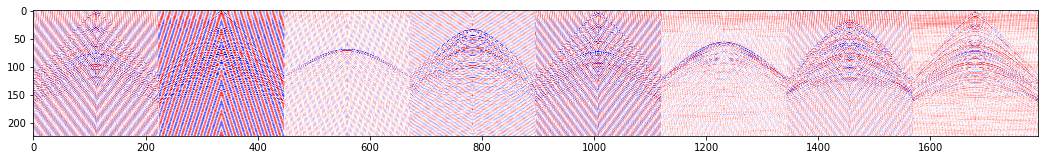

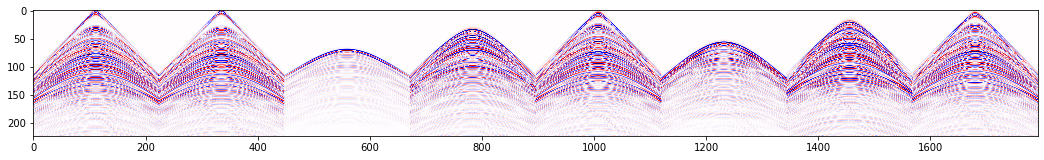

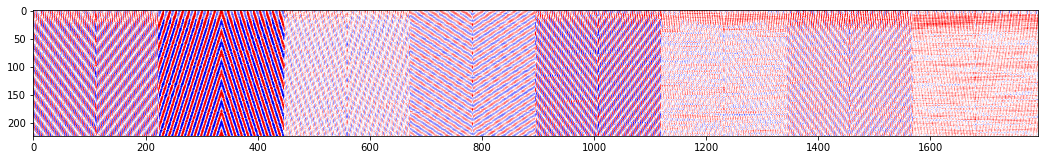

In [10]:
# Examine training data
%pylab inline
import torchvision
sample = iter(train_loader).next()
figure(figsize=(18,9))
imshow(torchvision.utils.make_grid(sample['input'], padding=0)[0][None, ...].permute((1, 2, 0)), cmap='seismic')
figure(figsize=(18,9))
imshow(torchvision.utils.make_grid(sample['target'].float(), padding=0)[0][None, ...].permute((1, 2, 0)), cmap='seismic')
sample['target']
figure(figsize=(18,9))
imshow(torchvision.utils.make_grid((sample['input']-sample['target']).float(), padding=0)[0][None, ...].permute((1, 2, 0)), cmap='seismic')
sample['target']

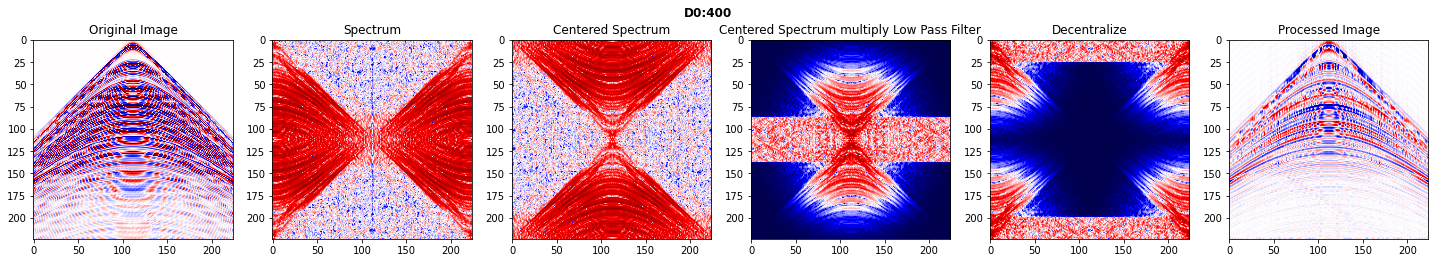

In [11]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):

            ff=25

#             if x>=112-ff and x<=112+ff:
#                 base[y,x] =1
            if y>=112-ff and y<=112+ff:
#                     base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
                base[y,x] =1
            else:
                base[y,x] =exp(((-distance((y,x),center)**2)/(2*(D0**2)))*150)

    return base

input, target = sample['input'], sample['target']
input=input.cpu().detach().numpy()
target=target.cpu().detach().numpy()
input = input.copy()
img = input.squeeze()

k=7

img=target[k,0,:,:]

cmap="seismic"
d0=400
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img, cmap=cmap), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), cmap=cmap), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), cmap=cmap), plt.title("Centered Spectrum")

LowPassCenter = center * gaussianLP(d0,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), cmap=cmap), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), cmap=cmap), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(inverse_LowPass.real, cmap=cmap), plt.title("Processed Image")

plt.suptitle("D0:"+str(d0),fontweight="bold")
plt.subplots_adjust(top=1.1)

In [12]:
def return_spectrum(data, dt, fwin=1024): 

    freq = np.fft.rfftfreq(fwin, d=dt) 

    dtop=np.zeros(shape=[data.shape[0], data.shape[1]]) 

    dbottom=np.zeros(shape=[data.shape[0], data.shape[1]]) 

    newdata=np.zeros(shape=[data.shape[0]*3, data.shape[1]]) 

    newdata=np.concatenate((dtop,data, dbottom), axis=0) 

#     print(newdata.shape) 

     

    spec = np.vstack([np.abs(np.fft.rfft(newdata[:, ix], n=2**10)) for ix in range(newdata.shape[1])]) 

    #spec = np.zeros([fwin, len(freq)]) 

    #for t in range(data.shape[1]): 

    #    spec[:, t] = abs(np.fft.rfft(data[:, t], n=fwin-1)) 

    return spec, freq 

dt0=0.0089

fontsize=23 

xx1=inverse_LowPass.real
f=return_spectrum(xx1, dt0)[1]    
y1=np.mean(return_spectrum(xx1, dt0)[0],axis=0) 


xx2=sample['target'][k,0,:,:]
f=return_spectrum(xx2, dt0)[1]    
y2=np.mean(return_spectrum(xx2, dt0)[0],axis=0) 


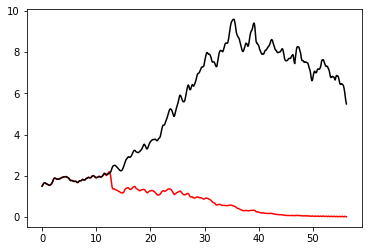

In [13]:
plt.plot(f, y1, 'r', label='filter') 
plt.plot(f, y2, 'k', label='signal')

In [14]:
filteredinput=[]
for i in range(sample['target'][:,0,:,:].shape[0]):
    img=target[i,0,:,:]
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    LowPassCenter = center * gaussianLP(d0,img.shape)
    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)    
    filteredinput.append(inverse_LowPass.real)
    
filteredinput=np.array(filteredinput)
filteredinput.shape    

(8, 224, 224)

In [14]:
# from tsmoothie.smoother import ConvolutionSmoother 
# def return_spectrum(data, dt, fwin=1024): 

#     freq = np.fft.rfftfreq(fwin, d=dt) 

#     dtop=np.zeros(shape=[data.shape[0], data.shape[1]]) 

#     dbottom=np.zeros(shape=[data.shape[0], data.shape[1]]) 

#     newdata=np.zeros(shape=[data.shape[0]*3, data.shape[1]]) 

#     newdata=np.concatenate((dtop,data, dbottom), axis=0) 

# #     print(newdata.shape) 

     

#     spec = np.vstack([np.abs(np.fft.rfft(newdata[:, ix], n=2**10)) for ix in range(newdata.shape[1])]) 

#     #spec = np.zeros([fwin, len(freq)]) 

#     #for t in range(data.shape[1]): 

#     #    spec[:, t] = abs(np.fft.rfft(data[:, t], n=fwin-1)) 

#     return spec, freq 

  

# dt0=0.0089

# fontsize=23 

# x=[] 

# for i in range(sample['input'][:,0].shape[0]): 

#     spec=sample['input'][i,0] 

#     f=return_spectrum(spec, dt0)[1]    

#     y=np.mean(return_spectrum(spec, dt0)[0],axis=0) 

# #     smoother = ConvolutionSmoother(window_len=5, window_type='ones') 

# #     smoother.smooth(y)     

# #     x.append(smoother.smooth_data[0]) 
#     x.append(y) 


# x=np.array(x) 

# xave=sum(x,axis=0)/sample['input'][:,0].shape[0] 

     

# xbn=[] 

# for i in range(sample['target'][:,0].shape[0]): 

#     spec=sample['target'][i,0]

#     f=return_spectrum(spec, dt0)[1]    

#     y=np.mean(return_spectrum(spec, dt0)[0],axis=0) 

#     smoother = ConvolutionSmoother(window_len=5, window_type='ones') 

#     smoother.smooth(y)     

#     xbn.append(smoother.smooth_data[0]) 

# xbn=np.array(xbn) 

# xbnave=sum(xbn,axis=0)/sample['input'][:,0].shape[0]

# xave=xave
# xbnave=xbnave
# f=f


In [15]:
# plt.figure(figsize=(10,8)) 

# # print(x[0].shape) 

# # plt.plot(f, x[0], 'g', label='Shot1') 

# # plt.plot(f, x[1], 'c3', label='Shot2')   

# # plt.plot(f, x[2], 'b', label='Shot3')   

# # plt.plot(f, x[3], 'k', label='Shot4')   

# # plt.plot(f, x[4], 'm', label='Shot5')   

# # plt.plot(f, x[5], 'c', label='Shot6')   

# # plt.plot(f, x[6], 'y', label='Shot7')   

# # from scipy import signal
# # sos = signal.butter(50, 55, 'lp', fs=1000, output='sos')
# # xave = signal.sosfilt(sos, xbnave)

# plt.plot(f, xave, 'r', label='noisy') 

# plt.plot(f, xbnave, 'k', label='signal') 

# plt.plot(f, xave-xbnave, 'b', label='noise') 

# plt.title('Spectra',fontsize=fontsize,fontweight='bold'); 

# plt.legend(fontsize=20) 

# plt.xlabel('Frequency(Hz)',fontsize=fontsize,fontweight='bold') 

# plt.ylabel('Amplitude',fontsize=fontsize,fontweight='bold')   


In [708]:
loss_fn = nn.MSELoss()

In [11]:
METADATA = './metadata/'

epochs = 30
learning_rate = 5e-5

run_id = prefix + 'denoise_model_{}_problem_{}_gpu_n{}_bs{}_lr{}_pretrained'.format(model_type, problem, epochs, batch_size, learning_rate); print('\n\nTraining', run_id)
save_path = os.path.join(METADATA, run_id + '.pkl')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



Training denoise_model_unet_problem_denoise_gpu_n30_bs8_lr5e-05_pretrained


In [12]:
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

class RMSE(object):
    def __init__(self):
        self.sq_errors = []
        self.num_pix = 0
        
    def get(self):
        return np.sqrt(
                    np.sum(np.array(self.sq_errors))/self.num_pix
                )
    
    def add_batch(self, pred, target):
        sqe = (pred-target)**2
        self.sq_errors.append(np.sum(sqe))
        self.num_pix += target.size
        
    def reset(self):
        self.sq_errors = []
        self.num_pix = 0


# Used to keep track of statistics
class AverageMeter(object):
    def __init__(self):
        self.val = 0; self.avg = 0; self.sum = 0; self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

REPORTS_PER_EPOCH = 10
ITER_PER_EPOCH = len(train_loader)
ITER_PER_REPORT = ITER_PER_EPOCH//REPORTS_PER_EPOCH

metrics = RMSE()

iteration_losses = []
iteration_avg_rmse = []

for epoch in range(epochs):
    model.train()
    
    # Progress reporting
    batch_time = AverageMeter()
    losses = AverageMeter()
    N = len(train_loader)
    end = time.time()

    for i, (sample) in enumerate(train_loader):

        # Load a batch and send it to GPU
        x = sample['input'].to(device)
        y = sample['target'].to(device)

        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        
        # Record loss
        losses.update(loss.data.item(), x.size(0))

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model).
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()
        
        # Measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        eta = str(datetime.timedelta(seconds=int(batch_time.val*(N - i))))

        # Log training progress
        if i % ITER_PER_REPORT == 0:
            print('\nEpoch: [{0}][{1}/{2}]\t' 'Time {batch_time.val:.3f} ({batch_time.sum:.3f})\t' 'ETA {eta}\t'
             'Training Loss {loss.val:.4f} ({loss.avg:.4f})'.format(epoch, i, N, batch_time=batch_time, loss=losses, eta=eta))
        elif i % (ITER_PER_REPORT//20) == 0:
            print('.', end='')
            
        #break # useful for quick debugging        
    torch.cuda.empty_cache(); del x, y; 
    
    # Validation after each epoch
    model.eval()
    metrics.reset()
    for i, (sample) in enumerate(valid_loader):
        x, y = sample['input'].float().to(device), sample['target'].numpy()
        with torch.no_grad():
            y_pred = model(x).detach().cpu().numpy()

        metrics.add_batch(y_pred, y)
        print('_', end='')
    print('\nValidation RMSE {avg_rmse}'.format(avg_rmse=metrics.get()))    
    iteration_losses.append(losses.avg)
    iteration_avg_rmse.append(metrics.get())

# Save model
save_path = os.path.join(METADATA, run_id + '.pkl')
torch.save(model.state_dict(), save_path)
print('\nTraining done. Model saved ({}).'.format(save_path))

0.009040450830685224
0.0096099611846195160.0121472963479891980.008362759713257487

0.008868679107302276

0.0093225941039884050.009101185698295471
0.009495543458165188

0.00890854004462562
0.008271288572253623
0.008847434539635997
0.0100994145711362570.009395245577951107

0.011221287571519956
0.009608911467771637
0.0091532471254514840.010437170379528328
0.009476421768730108

0.010579343177049269
0.009305300056738249
0.0083681570275677
0.009843081580230930.00989258777452701

0.0092723859585379910.009156930430257384

0.008570387986077828
0.009501857825175588
0.011004369525237588
0.009083101662451812
0.010192410203452396
0.00958579285335087
0.00881298376706376
0.008584376842826107
0.008874555965825322
0.008596459666350696
0.0087831964007872130.014223902976382517
0.008752554625838507

0.0087918114450507080.009157088443814746

0.0086010475439649410.009434676640336065

0.009204383205483753
0.010080213650817406
0.00852719497429487
0.0089197149436801450.0087797534619613120.014662140530227354




0.008362665806444533
0.008270075717328369
0.010276406578838326
0.009277910408903488
0.008819953098241353
0.008688888190624152
0.0099598784194528870.0093044862457272570.010403326537316671


0.009691809307559
0.0093681294195872320.009054231650643379
0.008814488546551551

0.009341911006380798
0.00983211324573307
0.0086721383604106090.00863682453313625

0.009741761417668878
0.012766015470534495
0.008607310251007586
0.00950053891377887
0.009410206518825223
0.009043602095859202
0.0084155231319984220.00906314809560974

0.0093349303676241320.008632664616645924

0.009896148277328622
0.0083702170929268950.00963820976018747

0.009526048005549109.
Epoch: [0][92/239]	Time 0.037 (5.347)	ETA 0:00:05	Training Loss 0.3073 (0.3544)
...
0.009038498298523658
0.0103302215726602220.009960726140826576

0.008621476139687225
0.009716175187074474
0.009952712617625228
0.0086239550432128750.00991350941046718
0.008957303624177584

0.008869769583725403
0.009161176940606397
0.0099566341909262390.009926767069355894



KeyboardInterrupt: 

In [14]:
save_path = os.path.join(METADATA, run_id + '.pkl')
torch.save(model.state_dict(), save_path)

In [15]:
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [16]:
# Validation after each epoch
model.eval()
metrics.reset()
for i, (sample) in enumerate(valid_loader):
    x, y = sample['input'].float().to(device), sample['target'].numpy()
    with torch.no_grad():
        y_pred = model(x).detach().cpu().numpy()

    metrics.add_batch(y_pred, y)
    print('_', end='')
print('\nValidation RMSE {avg_rmse}'.format(avg_rmse=metrics.get()))    
iteration_losses.append(losses.avg)
iteration_avg_rmse.append(metrics.get())
#scheduler.step()

0.31987180430694395
0.25701179570452526
0.2764554780751235
0.3641703214190951
0.30195340478182064
0.2884195629735731
0.30471261957868434
0.3072113929225061
0.2871753917427928
0.342855311812234160.29912752949123766

0.2851735461894628
0.2871360528500158
0.29744208419596396
0.28117199869305387
0.2803385126252467
0.30210371101099020.32144935715554646

0.27637264852355287
0.293624552682045570.3003320885086263

0.30619246532041294
0.2915282430705027
0.312446779323601
0.3217639919409869
0.27938857903102887
0.29855574693817466
0.28624240845496335
0.2920608110931056
0.31410967669268430.2842878370428942

0.31802062055777713
0.27601681198286790.31063658405695155

0.262148735061527
0.30608822568904080.3118077203170009
0.2637831484846838

0.40005444313911054
0.3020619382300021
0.3074412618280991
0.41696065862682163
0.28341207460103046
0.2880305474291978
0.30383828455804945
0.29150348392305225
0.3047098303280108
0.29741926297558813
0.3772455908457388
0.28139551593791473
0.30785531995475723
0.261326

0.2927166230403488
0.278532115964823
0.300584448899295
0.271817403788862540.2927244881949993

0.2773669376650756
0.32647281575237813
0.2886379512677644
0.30120774546185214
0.2729276441479288
0.3005970511230220.2833396664683973

0.23712387439338228
0.26590651064905646
0.2771200892217084
0.28991888112970865
0.29519193650947817
0.2907396229281971
0.2828792620691125
0.3074804107241746
0.4315369090615771
0.29668365105797473
0.280799324309487230.27399389339705593

0.28627185036425007
0.31438278704351090.4361983895316646

0.474202012826947
0.3136248531999605
0.26941441746984110.28778922127026746

0.2741261571252538
0.2864029569610711
0.291867778031228
0.26112252133684544
0.29101301893993875
0.2601382366436388
0.271081488919297
0.2889564495516815
0.2803929173898261
0.3757545678105417
0.34030557615262047
0.2840609152044809
0.3197043749218709
0.3890563072272035
0.3161607330899811
0.28979332614406866
0.2993402431146029


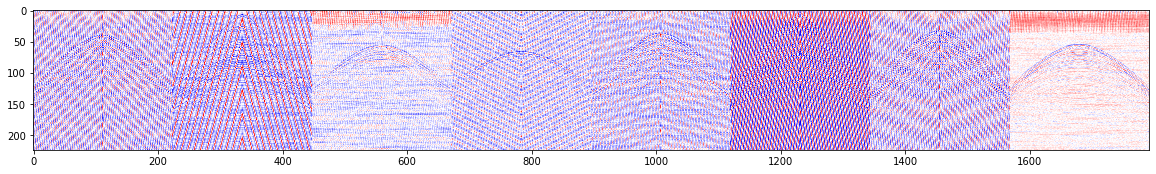

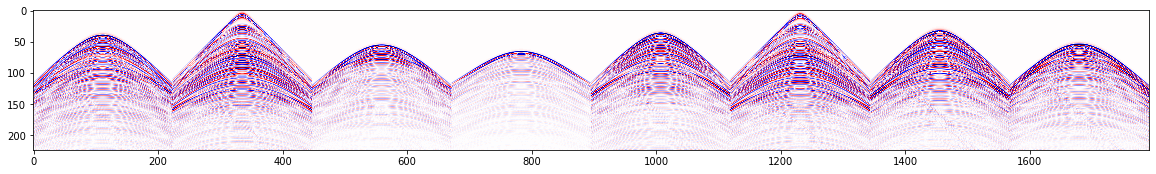

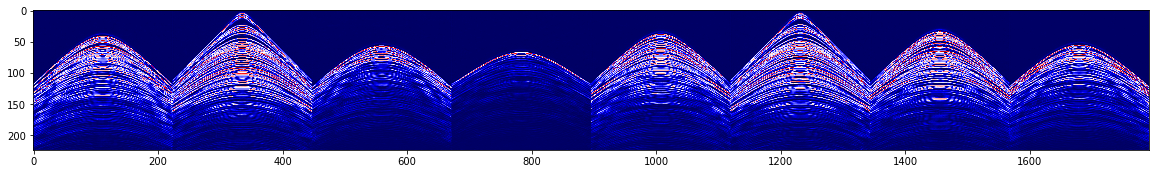

In [17]:
# Load model from disk
#model = create_model_gpu()
#model.load_state_dict(torch.load('model_gpu[0]_n10_bs8_lr0.0001.pkl'))
model.eval() # set to evaluation mode

# Visualize validation sample
sample = iter(valid_loader).next()
x = sample['input'].cuda()
y_pred, y = model(x), sample['target']

figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['input'], padding=0)[0][None, ...].permute((1, 2, 0)),cmap="seismic")
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['target'], padding=0)[0][None, ...].permute((1, 2, 0)),cmap="seismic")
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(y_pred.detach().cpu(), padding=0)[0][None, ...].permute((1, 2, 0)),cmap="seismic")

In [65]:
problem='firstbreak'

In [66]:
model = build_model(model_type, problem)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
summary(model, (1, 224, 224), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             288
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,216
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,432
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,864
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

Using cache found in /home/lius0e/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [67]:
from data import get_train_val_dataset, get_dataset
firstbreak_dataset = get_dataset(problem, noise_transforms=noise_transforms,rootdir=rootdir)

In [68]:
batch_size=8
workers=4
train_dataset, val_dataset = get_train_val_dataset(firstbreak_dataset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=workers)
print('Dataset size (num. batches)', len(train_loader), len(valid_loader))

Dataset size (num. batches) 239 27


Populating the interactive namespace from numpy and matplotlib
0.009558616278862012
0.009710919516768547
0.010555546518027425
0.009223333558981498
0.00949926855950976
0.009169988436769952
0.00951007913698818
0.008630977446738094
0.00938340910867636
0.01022202839632571
0.009311471683100793
0.0095089545460481160.009653369274222355

0.009057984034639713
0.009690065324696514
0.010394371026832723
0.011968899052501729
0.01001465997932612
0.012897997067169917
0.009218238879767924
0.008725525530643256
0.013655307663232976
0.0090706061206660780.010123461557770509

0.00837065916386393
0.008167241008881575
0.012008074521301341
0.0095922089062963
0.009370069564931440.009790110757200892

0.009361780178156094
0.00886782287817386
0.00942851022316318
0.00900306409978048
0.009574549370450295
0.0081292125030056910.009539131676435145

0.01068892656500639
0.008239313744219068
0.0099492955745097270.00859974960262769

0.008849120178494704
0.009261342374598237
0.0092698776150122350.0093848898919397290.008559

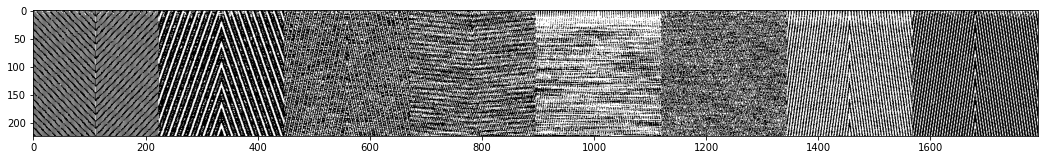

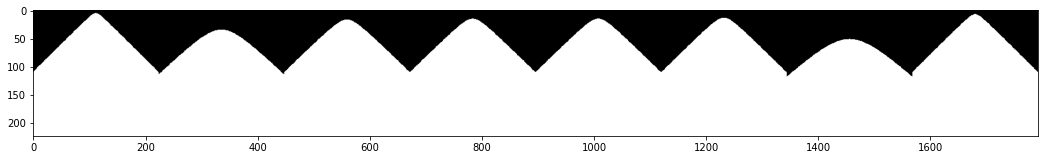

In [69]:
# Examine training data
%pylab inline
import torchvision
sample = iter(train_loader).next()
figure(figsize=(18,9))
imshow(torchvision.utils.make_grid(sample['input'], padding=0).permute((1, 2, 0)))

figure(figsize=(18,9))
imshow(torchvision.utils.make_grid(sample['target'].float().unsqueeze(1), padding=0).permute((1, 2, 0)))
#sample['target']

In [252]:
sample['input'][:,0].shape

torch.Size([1908, 224, 224])

In [48]:
from metrics import Metrics
loss_fn = nn.CrossEntropyLoss()

epochs = 30
learning_rate = 5e-5

run_id = prefix + 'with_noise_model_{}_problem_{}_gpu_n{}_bs{}_lr{}_pretrained'.format(model_type, problem, epochs, batch_size, learning_rate); print('\n\nTraining', run_id)
save_path = os.path.join(METADATA, run_id + '.pkl')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

metrics = Metrics(2, train_loader.dataset.dataset.class_names)



Training with_noise_model_unet_problem_firstbreak_gpu_n30_bs8_lr5e-05_pretrained


In [39]:
# Used to keep track of statistics
class AverageMeter(object):
    def __init__(self):
        self.val = 0; self.avg = 0; self.sum = 0; self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

REPORTS_PER_EPOCH = 10
ITER_PER_EPOCH = len(train_loader)
ITER_PER_REPORT = ITER_PER_EPOCH//REPORTS_PER_EPOCH


for epoch in range(epochs):
    model.train()

    # Progress reporting
    batch_time = AverageMeter()
    losses = AverageMeter()
    N = len(train_loader)
    end = time.time()

    for i, (sample) in enumerate(train_loader):

        # Load a batch and send it to GPU
        x = sample['input'].cuda()
        y = sample['target'].cuda()

        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)

        # Record loss
        losses.update(loss.data.item(), x.size(0))

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model).
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()

        # Measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        eta = str(datetime.timedelta(seconds=int(batch_time.val*(N - i))))

        # Log training progress
        if i % ITER_PER_REPORT == 0:
            print('\nEpoch: [{0}][{1}/{2}]\t' 'Time {batch_time.val:.3f} ({batch_time.sum:.3f})\t' 'ETA {eta}\t'
             'Training Loss {loss.val:.4f} ({loss.avg:.4f})'.format(epoch, i, N, batch_time=batch_time, loss=losses, eta=eta))
        elif i % (ITER_PER_REPORT) == 0:
            print('.', end='')

        #break # useful for quick debugging
    torch.cuda.empty_cache(); del x, y;

    # Validation after each epoch
    model.eval()
    metrics.reset()
    for i, (sample) in enumerate(valid_loader):
        x, y = sample['input'].float().cuda(), sample['target'].numpy()
        with torch.no_grad():
            y_pred = model(x)
            y_pred = torch.argmax(y_pred, dim=1) # get the most likely prediction

        metrics.add_batch(y, y_pred.detach().cpu().numpy())
        print('_', end='')
    print('\nValidation stats ', metrics.get_table())


# Save model
save_path = os.path.join(METADATA, run_id + '.pkl')
torch.save(model.state_dict(), save_path)
print('\nTraining done. Model saved ({}).'.format(save_path))

0.009396079384942186
0.009524691916488904
0.00861231091577818
0.013785213309958320.009597806985459548

0.01016365428159988
0.0101386969911727320.011255996107392948
0.007879905507505185

0.00976772223576449
0.0100508076793838970.009938986910644206

0.009528735018842719
0.010353873191595314
0.009460583883863017
0.009746781629392817
0.00989905040954270.010290397220386844
0.009850776577620221

0.0122085778597693860.008771428506419902

0.010033246918748627
0.009425082345070248
0.009541471829101431
0.00902050024851247
0.00889021407677821
0.009192999259493361
0.009237569291284088
0.009853385484990112
0.008466946081744220.0102087786835666480.010553282433799232


0.0089981875522646540.008581068880963726
0.009002861886927649

0.010591889889339996
0.010188158193790783
0.009477255656548975
0.0081822416540473420.009945615982915684

0.00906347272926547
0.008762086541381059
0.009914205272881935
0.0094825152018525160.009654390327224847

0.008825831502249823
0.010860964621571136
0.0093628341088549480.0

0.010392106337684785

0.009407988377826857
0.009963244421329577
0.009715063974873301
0.009399118846950015
0.0090917345276223370.008912966519391101

0.0090518480591723680.009773016269023986
0.009741972843150684

0.008245358290170157
0.008528917841492477
0.009639127657182047
0.010313261217929803
0.00888642646358709
0.009339442771472802
0.009260703077789072
0.008844589763928566
0.008558620267250544
0.0141486342787669130.007614718659987986
0.008566167520362065
0.009752596467347530.009075686553405692


0.009904385262693055
0.0097011783639564270.013415573045129966

0.009403472925700282
0.009347467974517253
0.010181808577617530.011382414728500073
0.009513936503009905
0.009798358876555719

Epoch: [0][92/239]	Time 0.047 (4.793)	ETA 0:00:06	Training Loss 0.4195 (0.4232)

0.009292336983901044
0.008629535802974382
0.008496015580522712
0.009316311050154779
0.0105687330091079040.009914043296183405

0.011201641685914076
0.012989901192234126
0.008848436168927956
0.009493157020809303
0.0105947837147556

0.011643273729126350.009528625569622388

0.009116725412899911
0.009259984710343238
0.008658078431336282
0.008492665849054061

0.009338041490564355
0.0107026085485322050.008308851006831385
0.010524811259697984
0.010649605457922796
0.00939293620697711
0.008974328075668309
0.008526219269130652
0.010576151404733867
0.01067857230147544
0.0085069733465865370.00878346950396034

0.00848084156202463
0.01207072765660165
0.010797325019401855
0.009889700622874883
0.0095109955647959070.0100790548179330780.011979746521681073


0.009436524877610349
0.0095978315836553920.009203236046307432
0.008792796979783718

0.009721715594426332
0.011109643823829013
0.009071300426892054
0.009151552905530073
0.010055565222007718
0.0117492551612972340.009446768842816223
0.009200250895513924

0.009364275622855571
0.009499740169002489
0.009722188637696416
0.008497860849992255
0.00997911323604449
0.008629618185877440.008825099392789639
0.009609993595634914

0.008474511615793864
0.0099196961124345240.01046323641875553

0

0.008739899375667177
0.013025436728567437
0.0086130500272114870.010287890936048786

0.014627340511747114
0.009817756692930843
0.00910741851045013
0.0093260918180891260.008810329875173101

0.011131158837268116
0.009471969086600892
0.00849511306747131
0.00943847714687694
0.009335282742148140.009642557673120885

0.013929538673301562
0.010384348940490910.009418936581134130.0094534548326921980.009094477390538876



0.011772319080934245
0.00906968535584738
0.010136217800000248
0.009397660522275959
0.008953760173500963
0.009282610416903031
0.008867078387240586
0.0092055131944378120.009703903312780749

0.00984551853211996
0.010270782658995864
0.009650358567895976
0.008959172851365850.009473173267310989

0.009463367320409047
0.00902621149233290.009496444701858788

0.010302443269632922
0.0092933199866646770.011796781643706629
0.009763326193136308
0.009780638556185765

0.009607143671259658
0.009800449092539517
0.009703917681353586
0.010133446806826223
0.008818696238866962
0.0093243986843457840.00

0.0091222284094025930.009109708631384987
0.008882183399413908

0.008754285573836099
0.01005668393675841
0.011323487943913349
0.0092178200873819420.009379510515382177

0.0100066526772636160.011336065582986353

0.00932413468520197
0.009129671467094992
0.009880131642623144
0.00947687329699780.010120594381074908
0.009115714112143897
0.009219778236309433

0.0089402668056307740.00824539615482412
0.009009747178267505

0.008570979239217043
0.0093833607425134
0.009004619649075946
0.010186708394203046
0.008889456778176883
0.009389039110585678
0.009539080303173210.007931141772910799

0.00889400310956258
0.00935147007118624

Epoch: [1][115/239]	Time 0.049 (5.780)	ETA 0:00:06	Training Loss 0.4080 (0.4086)
0.0081354777513875170.008937534494592761
0.009365574368828369

0.010275545359172926
0.009496268567504637
0.0101696009375100860.009271011283766846
0.00946630416915472

0.0107602081473736080.009366729558409068

0.010669787371078423
0.009433366128060651
0.009539110155136445
0.009762128553957895
0.009

0.0098127836002416660.009771942286851597

0.010169958384268346
0.0101719433415802390.010000961396130305

0.009038174204960349
0.008547917103881792
0.009710169170835177
0.0098803156014262970.009231451647039243

0.009189241789400683
0.0107467292750229470.009564907345068306
0.00936910106608979
0.00952281106012546

0.0106562809553449530.008932478458144306

0.009109575674141404
0.007804558311730750.008436705591081109
0.009323628618088175
0.009446197637355146

0.010036485940443129
0.008880769744403463
0.008640244546765211
0.009330046405363866
0.009609161547283801
0.0089924302689077770.00887950812597748
0.009787282372191371

0.009063850035436782
0.008578093557450688
0.0096008707821034060.007785785405477778
0.010480727573848141

0.008637095439272003
0.009471440001109934
0.0090500786855290980.009191341211291875

0.008922248086310116
0.008336293954088055
0.0095367010779138120.008694766158339843
0.008614697921324237

0.0085069954317865490.009260338646130463

0.0095227162757716790.0098330086972073

0.009823987883108695


0.0107064577816103810.0082953402379315620.01157021189486495


0.008761930737215610.009549789000023314
0.008848939756970113

0.008615323051937702
0.009209371339134017
0.008465900998847397
0.0091580200029848530.009398787921203692

0.009396987446498856
0.009118837504057741
0.011618645820378495
0.0091654812279725350.008649627461933674
0.010304389554226976
0.009118497473754893

0.0110329344102183930.008753057880556876
0.008592781845598058

0.009197563268859682
0.009320493288131254
0.008383887267828329
0.009836764878714772
0.0082980937213821580.009604179318656635

0.00832246927013052
0.008955562448841268
0.0101310696312391750.009815185725985793

0.00923252455999313
0.00957221184098204
0.00931660837981556
0.008637231467879274
0.0092811012697361120.0091627344476368240.011171355945146897


0.009522014100095495
0.009512486517469918
0.00946509558250286
0.0096411370086392310.0090369416152292110.009017892403399874


0.008650567673704009
0.00924983220071018
0.00947707749234586

0.0097538716110334120.0094111767776455840.009855639306700529


0.008319927728752785
0.009510856847135572
0.0088898697793328850.008464988471335663

0.009448897003908397
0.0078247413627235540.009740614666732560.009500381908510406


0.008971469287543284
0.009364220763619225
0.009354768489606567
0.008927918866229503
0.011442094865714353
0.0082357881413372140.009328106200580189
0.009019101804198817

0.009594095508799175
0.009359464504270856
0.009897826717501971
0.0100649709416505520.009625176793007882

0.00875301813243481
0.008893510069047652
0.0087341435765475660.009526624062197505

0.008434200725122994
0.009138856343302835
0.009688385704663896
0.014587522855607318
0.009142199026967366
0.0092727428109925910.009892593747631987
0.009832813955826155

0.009433524320840875
0.00946234118586658
0.008503726413986513
0.0088359883701372550.008731077458603121
0.008572216371028797
0.00948888918490187

0.00892470184549287
0.009552114893565541
0.0092709299703578090.009800848481658105

0.0086853898558685

0.008816058474186669
0.008992343280948433
0.009718752189688878
0.011571898382148454
0.009457035073181413

Epoch: [2][230/239]	Time 0.041 (11.483)	ETA 0:00:00	Training Loss 0.3852 (0.3966)
0.00940696273996737
0.008684320650942413
0.009505572717428227
0.008747473302160493
0.009406096624908359
0.00958859575120567
0.012171671908289751
0.009106005008469491
0.008700786079167116
0.0099215485221569170.0085083820597980760.008805957995945841


0.0097984086855620740.010327051395659174

0.0097526668564539760.010247647306802702

0.009830098707474616
0.009491397877571308
0.0138423974113094680.010047722696590695

0.009305522029903304
0.00852441654943361
0.008853641481558336
0.008825646086420658
0.009387368091299374
0.009180556596458812
0.008605110939045073
0.009105132070679811
0.008979857938581642
0.008815351107514571
0.00827432226651989
0.007887817651026054
0.00928901660530779
0.01025719201542961
0.009124224275259312
0.0085587935151885410.0099783246719315160.009475324987771979


0.012973473328967007

0.0089501223512972180.010147280021559254

0.00953434245828798
0.009839758594399133
0.010318088584166041
0.010452952780521168
0.008976444776702444
0.0090927430376055180.010039936999150215

0.0097444215580458160.008778149993101888

0.009294980758612601
0.009718885507684825
0.0101069974409414360.010335905901872295

0.009531178884925079
0.00893988630346014
0.0109705907782656230.009109752951328653

0.009782606586391853
0.0087377943069142250.00946040498028192

0.009269327600350768
0.009276962179916247
0.0089522276479803120.009641705082344952

0.00859158607684813
0.008908902744704935
0.0094360622409208
0.00854365580497583
0.009504548437505665
0.0087927963899302520.0091801212889346380.009112291304113267


0.008665222991717953
0.009541092604765159
0.009442226299919778
0.009366807205935551
0.009409462068680343
0.0097499840812943010.011242010977840187

0.008947320493495186
0.00997554442070994
0.009649295745407950.009407268584867526
0.009069748742661518

0.008383573563472252
0.009499351862306940.0

0.009137966902756839
0.00884605043069424
0.010635172258843827
0.009428839175606734
0.00986874178887961
0.008915295712316293
0.010619349720386508
0.008602712868443444
0.00981666844418028
0.010155218208732688
0.0101227156853901480.009409121633456594

0.00875356762376756
0.009346732084473430.008972799558370022
0.009578291233194765

0.00947642519442751
0.0098009759999018940.009503856518681787
0.009993572554273031

0.009779133138997136
0.010173662948670163
0.0099245835535797050.00917458870198175

0.009666578559830835
0.009083233218554766
0.0092131601873278840.008779430604305237

0.008163713752312457
0.008808333401655622
0.00926571839715061
0.0107782196613205650.012953011240101207

0.0089400728918235630.009552414238018014

0.0094718896857847730.0102810164363546
0.0096048028704197250.008943159436898638



0.009721760300814428
0.0091343548527375190.008685822676735273
0.0098676117506729630.009625367637609373

0.00801457729512908
0.00912574382693615
0.0082711236364875480.009237685177275993

0.00

0.009788095118789458
0.009005480844252836
0.010043328096814153
0.009484257328208184
0.008580640257743915
0.009675109652522192
0.009779862803459691
0.009622644930847885______
0.0124176480062148880.01096939170474902
0.008705913328498781

0.00949261594093477
0.0092952866162538450.009201616938186394

0.00838679430541069
0.009393789128096661
0.0126214070896810140.009312253636142616

0.008650869132768057
0.009951059330928828
0.009386784551480468
0.011316464544184909
0.009896144541453922
0.0091061979629578560.010495097278146421

0.009276757981450164
0.008810631911706541
0.008967344027071703
0.010052050220371752
0.009407057259446728
0.0105563940996883060.009513487650727723

0.0095382167598181650.009587787041287130.007906117747060449


0.0103520765955100930.009455669228178257
0.009375746607629526

0.009207678273020811
0.008973131880571196
0.009573111616235317
0.008650584801496957
0.008868724113406699
0.012233559893874764
0.009188071993793116
0.008869554708049801
0.010033633248168299
0.010053072

0.0094364861529760150.010490496669056012
0.009134002206844955

0.008765885542568736
0.0098521145530807170.009067537004111288
0.010347410159411787

0.010476034887293428
0.0103009332391512160.012058223763436845

0.008042278904210047
0.009283277726826493
0.008330420347092374
0.009208336793344526
0.008619323429932026
0.0099555535030868440.009256890723744046

0.00916779936374051
0.009225223926629516
0.009838152956437321
0.010965569457167836
0.010321912439199138
0.009737280921951242
0.0086412584887515360.008798545318630425

0.010038483713503734
0.010695787619678055
0.008552107882669507
0.008670628444598857
0.0103857790134555870.009482695628708248

0.009933476958694206
0.009992319288876691
0.009479800023896224
0.013288282077526874
0.009328171259394216
0.009571816189172482
0.00948462106669569
0.00941973194958023
0.010338824624437495
0.009797269065066120.009319869656070984

0.010156170335291856
0.0091956500264913750.009802047577382421

0.008248106195877545
0.0085116961141618770.0097023230295006

0.00999205496240096

0.009028021913230924
0.0092858334576077750.009358955263205623
0.010395137684499577

0.00948747017250617
0.010876492331223180.008684313170888072
0.00904751928703295

0.008260084260774701
0.00934872738850741
0.0097957431505206160.010327852912564519

0.009130572650301408
0.01065584605736460.009538829692896872

0.009455399107770789
0.008857047462089516
0.011813952599615780.008620962952195724

0.01269221286957384
0.00880131385824185
0.00988382404573199
0.009298734179729650.008928690031225756

0.00936592102963393
0.009249896825033889
0.009167158169077809
0.009069588708350987
0.009936972037710032
0.009836937628748066
0.009562372903069353
0.01045669874285386
0.008991486446949016
0.009795025022256496
0.012251366118175507
0.011692690765832351
0.0081270602173916690.008270776562136676
0.0097153714592284540.009649255254795862


0.009303813902143286
0.009396724036685592
0.009816230271602942
0.009504037758595324
0.009282244259022715
0.0091940329413098280.008571075640828039

0.008

0.00874318981144095
0.010666009589090255
0.0094979214601199190.009755529723805199

0.009215924976610737
0.0089264316481883210.0079283031506524590.00949549392911994


0.010468178484871090.0097412176908575450.009458324186890228


0.01082439737509685
0.008800145021921137
0.0100443278614153720.010459883086035794
0.009418537255290274
0.008752700160453705

0.009661852129699337
0.009174503291557444
0.008704538457308633
0.010501290147974036
0.0087529824763383590.009498477599964751

0.00850885044568376
0.009052468847605908
0.009775818914649312
0.008781892920295638
0.009660939156912943
0.009748219101101033
0.008657835373379389
0.009713321691160804
0.008468541273865746
0.008761158826884897
0.00887406567981232
0.00917789395790515
0.008327045420426787
0.008226515889887754
Epoch: [4][230/239]	Time 0.039 (11.251)	ETA 0:00:00	Training Loss 0.3804 (0.3833)

0.010214863455537303
0.010053333165614152
0.008719634918508216
0.010277393654474703
0.008770480033092717
0.0101815800029891
0.008402691179302629
0.

0.01025085309070979
0.008554032309432094
0.01003817773131608
0.0099841742550412960.00980155060602376

0.007966243626099512
0.00890829119738058
0.009570534390128517
0.010291460518674786
0.00904306612597219
0.009888722448913385
0.009768431997934701
0.008583285709168508
0.0094314132577584550.008798685889625738

0.009801393022385077
0.0093916762944150650.008931235577760084
0.008253353365581391

0.0098757722604963980.009567663120619404

0.0090534380229201070.009024869688089372

0.0097027324171286640.009317458092338034
0.0101069132714847270.011641226204660238


0.009506206282326464
0.009163228323793780.010707309655293935

0.011875992142593089
0.00917448659496859
0.0105675111113583560.01113862890133936

0.0097139558964821
0.0088457919285793
0.008950921196013852
0.009857946058671746
0.009393323940391609
0.009745632247074143
0.010081039336450534
0.0096724372509562510.0092567305545768350.014325519539439443


0.009218458663752514
0.008360901710797971
0.0085027842025389760.008571501066859957
0.008

0.010009950993457393
0.008677661602181598
0.010933105960674785
0.009150675685440217
0.008188349019880761
0.01051952599532082
0.009116476846713932
0.011258223651717946
0.0093076154405068740.009496750200372793

0.0093828139708519430.009275383979256632
0.009665619076146985
0.010314507814180843

0.00899612912223636
0.009310386957275303
0.0101311753468137420.009288974473746202
0.009172054037807992

0.008732402548620758
0.0092740176020389940.0097030039248188930.008179587476005163


0.0086589472606348280.009039834806729668

0.0100691563102233060.010073390063271483
0.008842080835637083
0.009542192160524786

0.009896613042143133
0.00939779595758258
0.0094656820639508390.009553797731541578

0.00934892409840821
0.0127098161589557070.008712454245689588

0.008915921564487379
0.008292965822265352
0.0091999254302919230.009235768874658429

0.009527887199445795
0.009027061901820784
0.00894671648501726
0.0087790201565424040.008914987063705715
0.00896198704056415

0.009853749938541866
0.00898556832938162

0.00984166329155402
0.009219786018693082
0.00917046577167309
0.0097210774916101640.00883926871020805

0.00983288329467607
0.0088846404622464120.009628984512829819

0.00961522802348348
0.00861273252199525
0.009824110849836705
0.009601067696859355
0.008783718489971355
0.008486529790036213
0.008374593887591753
0.010639967172220426
0.009165330615359313
0.008371101281499165
0.010359015375082787
0.0093080477202199930.008523939241960423
0.010253808996834956

0.009795721187850770.0092933496381023360.010129247754667442

0.009033767593591837

0.0100150479396150810.009280281172581424

____0.00868125375870629
0.008888524802722111
0.00924167916075806
0.009902634270554848
0.0093648356252431020.0101423536974068330.008822887163813884


0.00927631612936877
0.010698155182016860.00947897528539727

0.009137317134449454
0.009557027906649817
0.009750362685342960.008130635552660461

0.009790151707316053
0.00921490385838947
0.010204605962008645
0.009247397370412478
0.008833000941175012
0.010020486371864843
0.

0.009561254045070190.0094965031854134430.008261688374146977


0.009637430216643655
0.0086866469974695320.0096302763568677470.009071383298749515


0.0101812747255478760.01153793472799340.010441864074130607


0.008698229336429528
0.0094528228257054290.009197976995233012

0.009153898522129231
0.009827763702386834
0.009278517928920855
0.0095623680197037070.008817634299865493

0.010160413796246930.009436808188550699

0.010288555551857547
0.0093964330230653210.010566014373494163

0.009213314318876047
0.009919398830184178
0.009037668166876924
0.00959554097834517
0.013891027626794363
0.008495051952409510.009672058964493748

0.009460471214788395
0.008889875808831046
0.009722637205999859
0.009923631525821944
0.01107073778453482
0.0093174534559177860.008403908761372385
0.008692842465044788

0.0093316937559554760.00905090359881693
0.009896831242612128

0.012781010713184533
0.009286453858711739
0.0101418616419552670.008880495972231105

0.0097101015518738350.010764212082703234

0.010112294362568710.

0.0087598724167141460.009103604199915348

0.0102602841007163
0.008027475878436949
0.0087816210918630520.009276059441174602

0.008636019882770142
0.00957995740064719
0.010174683302580234
0.009406642063030933
0.009824775807089231
0.0079157396951710680.0114198975718690230.008214085622718083


0.009113892434903277
0.009962450790865301
0.0090323083918078
0.009044616182418712
0.008550236750596915
0.0115278357761852120.008989172146020828

0.0099200624847685820.009462416327981534

0.009684844295985665
0.009380902785928874
0.009370035402852117
0.008785982968041684
0.009873771032950788
0.009544206470359163
0.008978575392338303
0.0091683771569525
0.00913700247595256
0.009005286566010347
0.00878544471018663
0.0084870902946711370.00851390765574848

0.0092378993787013680.009979609381192191

0.0095620868857764250.010946188200745369

0.009180227379282938
0.00934610160420067
0.0110111791123631390.0154528316790594760.009550665774789309


0.009183635791264265
0.009343398701196865
0.009737234625960541
0.0

0.009102816433850544
0.0085669082514924050.008814153052974423

0.0092212843722755870.010038639786979133

0.00918853961863691
0.008887100692562199
0.0090525963917248080.01335756348389127

0.009913348956054894
0.008906410458780841
0.008558182148924330.008340229862823224

0.009007593697268378
0.008827284790315956
0.009110686936147134
0.009316607055365191
0.010299350004400357
0.009841616736635162
0.007879837290786508
0.0100872467731423050.010061813149906677

0.0130107461346057140.00948078811655195

0.009498472093310430.011477215094106999

0.009692648563251497
0.010281636612014356
0.0086455555715326190.008691242342646288

0.009092663559655136
0.009128148700127445
0.0087332776309705130.008272422422687765

0.009100582221467729
0.009581062431288158
0.008926687589498774
0.0088543639789946640.009218430784967611
0.00995465676324949

0.009976743361155949
0.01057560014626654
0.007947833610182385
0.00875454752630866
0.010143376415133033
0.0089298500704661860.009748386579992855

0.009623405833396843


0.008693854950480208
0.009275809987999024
0.009404399960795867
0.009445608122277502
0.0098712962869520280.01265212825106567

0.010026825767455089
0.008930462147600633
0.00918491194335672
0.0100565334744259740.010038960406337706
0.012121777101057473

0.00952301862369451
0.009310841982213701
0.0085385570846956310.009423643054211686

0.009776386928677099
0.009594289336571641
0.00949748856960237
0.0093637330798846340.010047554787352616

0.0102171590619875960.009068156809540826

0.0114049556286386620.009946012951852986

0.0098502805750275630.00897316935282577

0.009378040822868132
0.009257770772419821
0.009033894611271388
0.009466518848608066
0.009407576475316882
0.009971896980091278
0.009642688199492528
0.00964677035001779
0.0094322249888476630.010160795015232045

0.009044211144572411
0.010459483267755414
0.009721646372443072
0.008508831665068621
0.008285171936660205
0.008665084934320030.010312922838530669

0.008842666025487026
0.009723908133876446
0.008642781557705231
0.008471315144014039



0.009867124450492287
0.0101032571503715110.008611223984655476

0.009402342379204663
0.008743338534207366
0.010630120437175380.009591795455430263

0.010479846851212673
0.0095333743746341490.00873209770739798

0.0099993668003506250.00961326259413897
0.008345880829109571

0.0092193995095160160.009847196856037185

0.0098160450157689390.010444326937266785

0.009569373798553408
0.008834271408509295
0.007834884495647542
0.00823503733448971
0.009145380798440194
0.009516571083715215
0.010004206327901694
0.008902138015468170.010207653699865605
0.0094642836512356020.008971987591780589


0.00993217549894648
0.0094695062277290830.008988313450699198

0.009099888479989125
0.009505026774948012
0.0091193628245979570.009492517631899587

0.009098715425651919
0.009740413434000323
0.009387074295478847
0.009093556820368812
0.009923756248342849
0.013751022891793785
0.0097715503494429630.009616170473385397

0.009270510310924790.0086310439433082020.008695439882900278


0.009169119224643071
0.0099437568392156

0.008743571835014712
0.009353116987319002
0.0081828842669266440.0092552383058632

0.008915746292763826
0.009209698767273894
0.0119226967678860010.009172280611100956

0.0091209765969485460.00900999739059829

0.009550637242282643
0.009051511131110178
0.009350464723204572
0.008504208633401598
0.0090563223904843930.008916560849173983

0.009108119729747233
0.008568648885831148
0.009050766102825961
0.0098408017274258880.010203725754941185
0.008324537035272838

0.012996501003056367
0.009943204662576463
0.009870338845587844
0.009114328455581243
0.008202813358710120.00974933428541676

0.009836524958178335
0.010548634927512741
0.008958279467946327
0.009433026676483141
0.00929429199345162
0.00942646851847044
0.00830392549781296
0.010322653811652836
0.0105438659801527030.010108974267511601
0.009915054237325574

0.013113974679319336
0.009927156520096599
0.009967258432079193
0.009217927699130081
0.00963063227622586
0.009000536782806634
0.0095023062695850230.010196843453340525
0.009146752934808869

0

0.009777143167878826
0.0094604630207785620.009431502839949328

0.009453415287166098
0.009485669201326367
0.009876050562316725
0.008707985127756357
0.0098498245928339120.009478886855623432

0.009505700250906916
0.00930056451088732
0.0089714692875432840.009333841499020414

0.00972581659216653
0.009814059100894057
0.008563810686678162
0.01016452364729835
0.0096748439884166430.010448005088811073

0.00936527189812523
0.010137350613255108
0.01094131066003136
0.008128782458817775
0.008844385058419824
0.008643084184149021
0.010525860158930273
0.0095771287596707840.0084939536829641130.009067728331766839


0.008989115428850458
0.0096992465457275080.009564206610563154
0.01010749391338734

0.009492751376996475
0.00788422878146523
0.009417311062825805
0.0087472812400541820.007936485830740053

0.0099201668457749040.00823831322246381

0.0094675205868660840.01162724269207855

0.013769574358874154
0.009094035695505497
0.009040796289764032
0.008226643940127617
0.009420050811583891
0.009364241503011057
0

0.0095304726888174730.0091125396421058960.009946624315805322


0.00880435854438976
0.0097513992824978260.0091241162996262
0.009365236432707476

0.0077628833350074575
0.009812680751732559
0.009723789826906274
0.011534081604296136
0.009180493580406505
0.008793847634405876
0.008927595965254085
0.009017815469428373
0.008570109480873230.0098940506540187

0.010069731074599152
0.009322238708542204
0.01439259550857289
0.00927611983711872
0.009674028519312408
0.009507158512022922
0.010243012085741464
0.009227525612029688
0.00890378771009378
0.009038462148474560.01039843477662072

0.009871577310435017
0.009077106373171344
0.010659619242616616
0.0085373880368312950.010747773522029443

0.0094860639420576570.008948341813658592

0.009449795545938881
0.008568498204512883
0.008997820634371342
0.008651958671371978
0.00866447203550773
0.009332050537120481
0.011141081061921689
0.009136762356416405
0.009053189143908907
0.009416915934167228
0.010025935315154695
0.0092912718597989940.008183300639963429

0.0

0.009712946677944293
0.010030722301237732
0.0096279164917515360.008812936362116799

0.009938607081530517
0.0118832103235389680.010489460681728513

0.0087403207442716
0.00892398058337037
0.0092521350809463
0.009333717870660159
0.008981371629878575
0.00953900532697322
0.0101607036460919750.008694160587524457

0.008552367361866237
0.008319555951825638
0.010174812835826967
0.008824828448006550.012410473533722132

0.0086701971366494030.009304753096638755

0.009555173266976667
0.0091294927779409980.008619352904079844

0.010698310611775357
0.00896727224762238
0.0099545342868741050.008663575755524722

0.009771537965316079
0.0082200772149922840.009781600572901850.008328249114481783


0.0095493423243095730.008577084280820461
0.009538988665755503

0.008475613631982664
0.0094979269661358090.008994353070766094
0.009214200351493848

0.011191365762952269
0.012185156517420687
0.0092780811632484860.008327239575226412

0.008821653217333763
0.0088362022181920110.009176263195884011

0.009777126393705975
0

0.008829346367540942
0.009703459344850663
0.009574759195595167
0.0084272660943731390.01041689846766559

0.01028861369973123
0.009202496199561162
0.009168164243543912
0.011782320478541707
0.00951451109573817
0.008719445817058214
0.008864268325903611
0.012487512201981547
0.009193296507870154

0.0089543155836051960.008836382716388128
0.009442274594617647
0.00882645080003852
0.009712431351934699
0.009962770348231781
0.00871464909694688
0.009535224029241781
0.009575125712242751
0.009495045439622516
0.0088982145866035540.011093340483337941

0.009860264275424191
0.008484813018470677
0.010651924915761926
0.009804212702765595
0.009061951914796413
0.009052338806322271
0.008703398649549558
0.008129858411003195
0.012042890301022643
0.009509803829097786
0.0084441127065368050.0097565681462103670.009012307556271743

0.009852583337699413

0.00921691845152226
0.009212370182204927
0.009584621549603517
0.00894893015591875
0.009051201729473397
0.009177802702169406
0.0089741928963983
0.009313359973385527
0

______0.008878807983177736
0.008161613293506613
0.009759908572340839
0.010294422914390146
0.008171089161449705
0.012945748393485485
0.0086900299621455420.009089218958349932

0.00972083669265797
0.009990703078807662
0.008933515876804013
0.01197850281326478
0.009404455966586744
0.00890261750076972
0.009159497066238360.009965532117233075

0.009101877109381824
0.009526401108932629
0.009021122332453465
0.012538424466304801
0.009028974665250378
0.0103260140838790110.010397684953921911

0.00924037285502297
0.0107656063386581210.009402120484036472

0.0099924526000411680.009749607682279065

0.00920133336216238
0.013168586683684664
0.01175217641032483
0.008279880059488896
0.009300513035349641
0.011355620517535315
0.00883467393830503
0.008636110924793649
___0.008555095915540881
0.009741540589207426
0.008377295300426304
0.009228576819847298
0.009384775658810936
0.009974076320038243
0.008744819038982603
0.0082289112959248270.010100996089285679

0.009356189488534684
0.009687161990128219
0.0085706396

0.0095662323209498980.011099588558494794
0.00926301006555174

0.009095579291152426
0.009700390037502865
0.0091597108574915530.009543050170617552

0.008626382572748576
0.009932020460544103
0.0096565824810002430.009129064206841505

0.008802507833622180.009243502090669565

0.0090832105579017240.00966281798918403

0.0096329325882862030.009845388373124535

0.009878722760254059
Epoch: [10][69/239]	Time 0.038 (3.726)	ETA 0:00:06	Training Loss 0.3560 (0.3656)

0.008613806247979989
0.00801389812630376
0.0092306942556478080.009378079740294046

0.008702274162268679
0.00951727245682966
0.011219038127028695
0.00939161371141782
0.0094678002908990880.009988967872701628

0.009062280222143126
0.01242287947280102
0.008721432371770218
0.01118284487164283
0.0099928563641256820.008816446892261662
0.0092562128211456770.009364175271081486


0.009595234710339899

0.0102795207418144870.0095002868815267720.010198152518524767

0.009422289546198635
0.009017781966334954
0.009296518819967969
0.0094930263859664980.0



0.009125056408515587
0.009768080379783012
0.0116471815352647310.009437664339364216

0.008994354922383613
0.010106116069211845
0.009531901822109369
0.010441092172399103
0.008740711260441080.01001016275297194

0.009456599078783877
0.010226544105014324
0.010474481078774375
0.008840232120840966
0.0085734319891994860.010188149482675785
0.0090665648080019740.009060601343218665


0.0090771755213773330.009969399347340226

0.009414384244237305
0.0087909523050998080.008833756985954897
0.01239355904073974

0.009507224023613127
0.0084889503816212970.009003117901060217

0.009893422585885478
0.009389793785881008
0.010673210609434528
0.01005290676587040.009805060536927904

0.013149974236195497
0.009328754173747763
0.009869807426858404
0.0126638879388138810.008665946003127284
0.009990476912037735

0.0091855504742746840.00973178923940549
0.0087104821979453620.00857436468276545


0.008614498057216168
0.008692482732020160.009911444893751719

0.010715100875899329
0.009649900303554565
0.01052058819681378

0.008968309173481688
0.009417730585019893
0.009002314659166935
0.009651285176361714
0.009505268029674375
0.008879511735247038
0.0121720381338276
0.0104320806856240520.009113059168416664
0.010065919361443241
0.00942754588045476

0.009304787444897643
0.009357602902433254
0.0088572347982180110.0161770590167924360.008819073021712002


0.009340795213298546
0.009391066650407313
0.008898041822534465
0.009791269192671488
0.009709859138444092
0.009594497218538625
0.0090996351453968580.009242633225303288

0.00937335698793947
0.00890292166513
0.008813415175518566
0.008111894032442873
0.008958103751397311
0.009483892245178642
0.010882860789518870.011791863603317937
0.009220594161040738

0.008757018134841725
0.00951997319021222
0.0104677253653225920.014894795957932019

0.008994625266722563
0.009291920654007389
0.009067272922479908
0.009443405920198206
0.00891585727717261
0.008986685893552420.008723548142409101

0.00938265814587989
0.0103662971332291260.008872375930106213

0.0094883630155956560.0090

0.009859387585439952
0.009848436919796762
0.009241400929033229
0.009410851759196441
0.008897469211981498
0.0096082909041434580.0096076556314575070.010288696884637656


0.0091520947831691160.011294124783741534
0.009374459789530961

0.008891587914191618
0.009534877207684672
0.009233109239956303
0.00930897851375374
0.008847842450729232
0.00970243937825982
0.008357736527125565
0.009563185006392140.009182457773038217

0.010415954770954210.008640263342401285
0.009696303994280696
0.008352694354424388

0.009827290645239847
0.010159226214697673
0.009872977462129872
0.00960563346013133
0.0149216995564428260.009521360443408082

0.010096054711200780.009613718090361996
0.009623718142065557

0.0086384416850154680.009668392547123381

0.008776002956223165
Epoch: [11][46/239]	Time 0.043 (2.575)	ETA 0:00:08	Training Loss 0.3652 (0.3641)

0.0083962352744630860.008592358247426905

0.009655496948844695
0.010623160811792591
0.0096721624550196330.010545503228530529
0.008630231277714326

0.0090119772830406630

0.0097473839675939950.0093966337666434270.00851048467662145


0.009027497114854018
0.008339102285510295
0.0139762427757991940.009824842823278083
0.008213264140860689
Epoch: [11][138/239]	Time 0.042 (7.043)	ETA 0:00:04	Training Loss 0.3541 (0.3636)


0.012551593665137745
0.010366947319516274
0.009666326195735141
0.00964325361811459
0.008762131057874640.009070355669190278

0.007858708253610262
0.0097708073573869280.009808559036379717
0.009433286015285907

0.009674466941831559
0.008458931086739539
0.012392968442709752
0.009513584323025208
0.009233866377206598
0.008973925007695536
0.009212947779191216
0.009393647076023810.013709986998356752

0.00883692187206932
0.009322933611511524
0.0132534893649120260.009479100735116297

0.01021186233027138
0.009352320149143934
0.0094441040350142
0.008928488712687838
0.009021385595406493
0.0097963867004663140.0092758762887181610.009114606694067787


0.012256121445117455
0.0095643608470944940.008831844502612755

0.00945661272432147
0.009701511538605018
0.

0.0093608187402631340.0094927328144650620.008088705212263098


0.010922682140466365
0.009107633674563858
0.009586871883692474
0.008892592929807867
0.0092685587381262320.008695183762975574

0.009571738600515889
0.009556724092172458
0.009876913844212241
0.009498601501375019
0.009769826343930654
0.01158138905274572
0.0089371469123982060.0114300823106849

0.008670594603727062
0.009796103352358226
0.0098377911324778310.009206837470434891

0.011770596928178811
0.009016163567096754
0.010004196401353046
0.00934782062956294
0.009230526541144125
0.009646300357673795
0.0097001976421190110.008142744538287897
0.009560842560921632

0.009113341764917333
0.00961874410487566
0.0086377437479459550.010216381004165994
0.00888505964124755

0.010525005641034289_____
0.009771038983964617
0.011395726046300701
0.009527144788730593
0.009280091282929148
0.010670299848190496
0.0094681189958327040.009685327355670357

0.009141407117760477
0.008597338729058941
0.009192215286574353
0.0094962651274455840.0096877233281

0.008912408954675445
0.008975600189164719
0.009840336279558284
0.0080473138240574720.009640664019563770.00955872014431427


0.014124521484850666
0.0088723975509930.008413333778374589
0.009335482876128145

0.009015767275004426
0.009131225912640156
0.0099808579401474430.009663167769112573

0.008893519724151071
0.010425747727958236
0.008811875809776644
0.009972450071937191
0.009879412258183461
0.0099141925245239580.01012494581108485
0.008986178211424743

0.009215821299465115
0.00935467768855986
0.0088467412368010460.00900068202799913

0.009086055983309142
0.01384085675781901
0.01310733893779274
0.009536705241215226
0.013686714660109563
0.009548880385906717
0.00857948324506229
0.008546751064790126
0.009503937834594125
0.009352043890219654
0.0101598782476504420.009499055834202515
0.008599679637788883


Epoch: [12][69/239]	Time 0.075 (3.638)	ETA 0:00:12	Training Loss 0.3653 (0.3620)
0.009530706920873143
0.009820637304455641
0.0134314816336744550.008791227070100499

0.0097399248639463160.0092

0.0089545902556934770.0097934229728812920.010173039938448886


0.009031983497225466
0.009097799680710766

Epoch: [12][161/239]	Time 0.034 (8.056)	ETA 0:00:02	Training Loss 0.3565 (0.3625)
0.009695509287929819
0.00956618763717384
0.00945806551704854
0.008444105090557410.0092969019311329030.010025616294074138


0.009005740719975551
0.009395765511306933
0.009435991592614424
0.009101985823423753
0.009149870809872328
0.0092083497318188980.0094325189025312620.009570718880943227


0.008777967750987313
0.0107161906767702170.009063037173996319

0.0096564074704547310.008009964055017414

0.00999308949560637
0.00928919764371088
0.008291282931047462
0.009712735790718525
0.008442974813947552
0.0096094525012384610.009335724910079045

0.0091844131528431350.00930175520668927

0.0090013057085070480.009682511259524278

0.00969223715929426
0.009147405961013955
0.0091244586546923
0.010320777825320017
0.0087309064710170570.010273515739864474
0.009661295922150617

0.009361277370980326
0.009537014723464991
0.

0.00863965850568553
0.012589774131929252
0.009570089265439867
0.009487396005409043
_____
Validation stats                 IoU      F1     Prec  recall     Acc
empty       0.8625  0.9261  0.93140  0.9210  0.9536
wave        0.9345  0.9661  0.96370  0.9686  0.9536
total       0.8985  0.9461  0.94755  0.9448  0.9536
total(-bg)  0.9345  0.9661  0.96370  0.9686  0.9536
0.009140501244970692
0.009015404502928774
0.009700554441097988
0.00953143463827714
0.00897726615835308
0.009392175642397957
0.008600688031420018
0.0096161895218074780.009670451933821092

0.00986233498034147
0.009223687943901241
0.009232079758542571
0.009071211906353191
0.0090778551157092
0.00895214938462169
0.00893184967082067
0.0084373366566332530.009645450653937153
0.009716491385279804

0.009827405589516874
0.008677607024338571
0.0086428317090218520.009301352553706383

0.009998405710759316
0.008864563280667526
0.0105059920191908770.00982282610992794

0.013434518611449352
0.009576971312049161
0.0088534381508937330.0092315842

0.0111867676052130730.009870152285081975

0.009550574610548783
0.009418242182015405
0.009519060562146889
0.009104456607614674
0.009429834311698788
0.009792142588513806
0.009372781891034831
0.01044236986473804
0.009482779327147495
0.0093351032272740670.009175688904719342
0.009903841939905369

0.008472755339105433
0.00919109629375942
0.0105960590408218920.00964878999232496

0.008536703552756765
0.009946055216572105
0.009877317256970610.009357935611074508
0.009908116791080035

0.009927663302911283
0.0090412502905751570.008703675482099701

0.009189147086716056
0.009128800344057265
0.00928998837050406
0.008848607012064693
0.009243440163125506
0.009138948100603174
0.00864841924458032
0.0092796872183551360.009668594381029455
0.00945998779249317

0.008304656295941577
0.008715407617457226
0.0086131196437835770.009790678239315275

0.00983892099752991
0.010158644338089592
0.009386722033659912
0.009018182778925722
0.0088163093112581210.010559449753672992

0.009764218614442242
0.012685325401649870.

0.0092471220561978260.011054706848947205

0.010484426380964341
0.010270747247169084
0.008905122789557978
0.009374288821529624
0.008894901223449308
0.008769257180919855
0.009362993289064274
0.009019356880879145
0.009857731052228856
0.0108162741883255680.008245143557478254

0.009062183732401193
0.009632639502846681
0.0093130416759893960.008852486807078234

0.009844125417967135
0.0091527562420153780.009484626557301697

0.0085815689018692580.010053273020240311
Epoch: [13][184/239]	Time 0.041 (9.139)	ETA 0:00:02	Training Loss 0.3618 (0.3611)

0.008970357960207176
0.00985691485453583

0.0094190956440778780.0086074866062932530.012552104516342434


0.008563551072142586
0.008364839542655053
0.010055533593002063
0.010246581827795948
0.008953626836397936
0.009219874868504306
0.011698066158083293
0.009518367220077166
0.009260158076618143
0.0095088641763597160.008721051700070129
0.009386806735423421

0.008674928957605415
0.00902718002692341
0.008748120771213803
0.009865687343849296
0.00939316238091

0.009521046443430941
0.008628850665425849
0.010688526477776123
0.00929208270203148
0.009687096123099554
0.009222631360155182
0.0095939957888659230.00909207634896864

0.013422524633187773
0.0090505079966339550.012462597090678820.00977167054995244

0.011303348368589606

0.01317863346483278
0.010977567310380430.009563584131770126
0.008757192487062176

0.009037465019745321
0.00967855532320912
0.008204742991458609
0.012823771565611175
0.009216163442898558
0.00880166196909386
0.009762605538359967
0.008409333980902692
0.008998259209756610.00816376765052258
0.009773541688213193

0.010013676822087784
0.0099133167158417260.009023595374581236
0.009455910030340405

0.008542236501572506
0.0085564815125502930.009161792323154488

0.0091452691310396520.009685815473805542

0.008806061530769382
0.01416029245359866
0.009123263381956816
0.008392559619911916
0.009614001563360819
0.00947805884911930.00816419581064238

0.010075768902732684
0.00897930858255210.00948756356975949

0.00932698706552288
0.00832665

0.0090592787246013
0.009171472572313547
0.00875367051491928
0.009496117207264030.009012699825909779

0.008913126529104549
0.00829093835834841
0.008897483707541926
0.0096190102265096680.009751906417649022

0.009788901420761893
0.008971143842742156
0.009349777048277554
0.008728127408072718
0.009141456847151482
0.008320894292989663
0.009118494936310647
0.008965948521588473
0.009419053001144612
0.00967696185096702
0.009069453154294114
0.009439768684183879
0.008993290368104503
0.008819275370354122
0.0100817294497999540.01016211847669323
0.008867320738010696

0.009079900799423639
0.01163865954381271
0.0090971808678246370.009553544954694423
0.00949005713206697

0.0092373700783406120.013587918827444876
0.01014176590465694

0.00932876678887281
0.00915619545101835
0.010365321596850420.010027954207675174

0.008511719882124836
0.009820340779431109
0.009356857400299626
0.009700591055757823
0.009375926347703574
0.008941408506508089
0.009173933715333269
0.009664592796297796
0.0134460291784742080.0123

0.009317235549370856
0.009229040778824240.013457777803332368

0.009247723593308438
0.00827922473731691
0.009297534364423880.0085834324142449150.010045932210651561


0.008937742925332424
0.0096251372113714560.008597106963838983

0.0091272270212491860.009710212332366748

0.0082537868163841
0.009760740038530022
0.00898919557288702
0.00884835791780597
0.0095623136053953770.00932871699252504

0.0091674357953564680.008982892603540016

0.0099406422192435220.008445033253220461

0.008097447622384842
0.009859735424314578
0.009426890890958852
0.009849589956111493
0.010080564066133090.0078538839161299240.009345914342618687


0.008879330673842644
0.0079892639389560550.010204984148141688
0.009939321546060740.008987162205757552



Epoch: [14][207/239]	Time 0.052 (10.187)	ETA 0:00:01	Training Loss 0.3589 (0.3603)
0.0096725828634437670.0096053962346864360.008828975248261041

0.00999439096527553

0.008660977878004914
0.009619113290832869
0.01248966119202168
0.00966310650236712
0.008881493667314501
0.009

0.0082303203716504040.00936618606176715

0.008653865453097254
0.009951034399822164
0.008589182591885715
0.009755403385394107
0.008979904080165814
0.0088614834101053180.00957036877375123

0.0099165747869845250.009858168488999815

0.0095640879704624730.008999866861405607
0.008831201837012878

0.00893946132570591
0.009172745987955873
0.0126538614927737390.014233029811482287

0.009005490744005569
0.009455578504198928
0.0094048048369535820.011073603574589513

0.009012273474424222
0.008465239957182957
0.009122644909997470.009220551999229557
0.00923820344459136

0.009506062878306628
0.008942517552842739
0.00905961310022045
0.007967758395622986
0.009187663666123981
0.009113586358100420.010120964802714079

0.008519674121424856
0.009326365882259184
0.012768505185159497
0.013384549276283434
0.0098233591073598
0.009359888245767906
0.0103754055267525750.009027498980143043

0.009583817714429989
0.009684497238405084
0.00906323144527536
0.012696117490230812
0.010048734121850868
0.009167128035135435
0.

0.010832421760975975
0.009146244239025181
0.009470561288560499
0.008812614022001683
0.008392966971326228
0.008845072023107102
0.009113662400107246
0.0102459034013738380.010272644538221617

0.009374938533113084
0.009103857123230603
0.009240548093544758
0.010101571380381364
0.009437078606706121
0.010217272953474117
0.009783620109626825
0.008810547813179711
0.009633681665443886
0.009530551688874954
0.009852721833950907
0.0091998020953217470.009942892393101694

0.008735502782262167
0.008800088301667284
0.009206272925338314
0.009652129511383035
0.012954793333824224
0.008707182202995751
0.013635282208168373
0.008903569973438462
0.009506703403793223
0.008756087398674737
0.008926586670269847
0.009717970371282044
0.0092637354497892980.009907379846034698

0.013219252998037868
0.008757608503122577
0.00882145372808585
0.01013630402601635
0.0099148712326976530.008866885235965004

0.009680653361381467
0.010064166432221059
0.009125628191083993
0.0093788272859531960.009678363792971682

0.0087235800754

0.008779852852795724

0.0103933308614494270.0090906039253720460.009289730925104026
0.0090730058831388090.008954650208634632


0.008929705885579014
0.012678197682460440.009152209173561908

0.0096431933130952230.009362579966798956
0.012127461216217666

0.009859314905789956
0.0114212966855914960.009439015471049878
0.010054230805165373

0.009897334186503194
0.008811923795737251
0.009586798257916558
0.009461498992723413
0.008734588255113524
0.008577954332759602
0.009082873179329922
0.0085519862397789750.009992731422319
0.010156640169298

0.0139350936694687040.00828483363205559
0.0094479639000588330.0085745929796305


0.0092923633351496660.0092601600392923780.00939128735123882


0.008658382701942283
0.00935246095405348
0.0089081785849485540.009813923893870775

0.009181704540240533
0.008425779573604332
0.009138554321869934
0.009323082153828864
0.009093378280359969
0.0084991541178476920.00988750876751485

0.009439019549497673
0.009165574161628836
0.008851860263628377
0.010248505458866370.01009

0.0093379749634665420.008257234214603925

0.010266646760835036
0.009564008413455399
0.009248886438927515
0.010170622844343115
0.008902749927628479
0.011410616978759879
0.0097611950791279980.010022692368983609

0.007933169438946395
0.009926570100115434
0.008736392461528833
0.0096779593174540040.0086088637826219860.009157990568957771
0.009882956574768963


0.009289617021590252
0.009974482395653454
0.009259524830506020.009005793315696713

0.009863385874796435
0.0127535169181232230.008695505068983487

0.008711548011880543
0.009305548455985505
0.0096374061236704380.009946258997937475

0.008902208151328845
0.0093819449097050780.00907438968270029
0.0100353647995063170.009347515971371236


0.009514508333107095
0.0089791603356114620.013219025020256356

0.009536465163439437
0.010225282782445236
0.0094560921749668510.008714695450409305
0.00867457529842678

0.009890875284206459
0.009227516517333414
0.008565222056544633
0.0099671386771549560.009569751082211574

0.009995204174876725
0.00940852728180



0.0094733909972429510.009347255994308010.008582562936688604

0.010072477388951229

0.008797507122401950.010323570919652544
0.008947360804345019

0.009270655220278144
0.008331708695057694
0.009995875725103655
0.00929347878879323
0.008547801154584433
0.009398279109357602
0.009290013391533892
0.008341070039800686
0.010256541878949142
0.009787671918240919
0.009698068880321131
0.00841000520620592
0.0095551878950512720.0096189805782778020.00856373347208979


0.008795848170690134
0.009279628746884094
0.00900401715786253
0.01122402423468514
0.009216877619565838
0.01181431678290616
0.00891949157155954
0.010458793048005025
0.0092994862834138210.0089850201222443130.01268209613747194

0.01212471494820318

0.0092369222061044650.0087467074390789480.008764108983813492


0.009931191915025391
0.01338933060191207
0.009280327824861568
0.0084834499846540380.009287933813834437
0.009030839705764616
0.0086361683960593

0.0089280021796880330.00831331938731384

0.009137436888720585
0.009028247023176074
0.009

0.012127892116240931
0.0096317667235951460.008392120068680262

0.009332437911434116
0.00958059741901606
0.008267071206861710.009141817720222939

0.01000432926602149
0.0099650760092498090.010261365284859906

0.011402747022255504
0.009125224759273394
0.009317281911612353
0.009101143989469025
0.008527622713071182
0.008968362560179039
0.0087133647227723810.00915458837493275

0.009266441585192697
0.00853976150537273
0.00942714514625949
0.00957424444096747
0.008562736521816843
0.009692733141912107
0.009672820563835583
0.010252222571597075
0.0079000411420294460.008089996770099403

0.009670060247532648
0.008867002805304508
0.00982474045825902
0.0086676571905606960.009017041239314828
0.009915156242837208

0.008492719776143435
0.010823893229005378
0.0096291146719917520.008468096463371924
0.010300840141840883

0.00856461201011193
0.0098183987257775130.008464953483184469
0.008565880892351583

0.00825110784241764
0.009088896889504776
0.008803823946089475
0.01127623683125632
0.009413082742944964
0.0

0.0087992482185268380.009225621963331897

0.009945889933375620.008141245440611865

0.00928584727263659
0.008872322478921703
0.010260139531697961
0.010292077914246085
0.009740996163115311
0.010061070155454096
0.0101487586949733240.008721977904393621

0.0102127702014503840.00966941036087294

0.010075444378968679
0.008926130738341215
0.008878641986130103
0.009668668555324380.009248163378198742

0.00915872967625604
0.0094969676392160880.008941474382763213
0.012256326588014923
0.009258397238868373

0.009269885482203146
0.013980973068130897
0.0100124307468829370.009420157103715663

0.00902019979158956
0.009442156919669197
0.009055469587365122
0.0092574804555512120.009028046786706333
0.012746176035356946

0.009186335886058933
0.009376478353771055
0.0103566073071793810.0087027976541116
0.009372685378190344

0.009610111263550146
0.0103710946880660160.009325357962849827

0.010620237697824938
0.010077652947597389
0.009183877093894830.009938608588731532

0.008961538514131626
0.011541907306522561
0

0.0100339543159277850.00901818588132931

0.010007719271990954
0.009863914375275012
0.008395414061434636
0.009951540601316861
0.0091244542083579480.009875748449304361

0.008942100865658838
0.00917743512701945
0.0093185789167152010.0094811495315123510.008682989404224982


0.009164488557743928
0.00976320983400264
0.0095762779043563110.014905538289033618

0.008477848135448423
0.0087490579904106920.008854440541923754
0.010348893809589418

0.009181364307362197
0.008717431757557603
0.009105368632938716
0.00906603990878072
0.008701025201055871
0.0096382792165486150.009979786425017444

0.0092173624413858670.0092738660259186

0.0095247161413389050.008962442965899065

0.0091780334155984970.0099744839137551710.010205307535407174


0.01018333293451099
0.010174688831370944
0.0095621615276638580.010260868040377118

0.009959781546197727
0.00918797216269872
0.009845210889131336
0.008845113208568326
0.009503946104086888
0.008676586257932233
0.009867145248906929
0.010896990632488866
0.0088447127111502080

0.010149729259503098
0.008947099401051109
0.007959745568948247
0.0085730809496581350.009952472297780231
0.0085288429197466160.00908408307467159


0.00931806815301816
0.010411506799348137
0.009809225560474520.009757861036838247

0.0092800301782231380.008904704740203582

0.011227399816879766
0.009285316410375678
0.009256912951739922
0.010659952146027812
0.008945150351576512
0.00908821879176724
0.0096026580795240630.009341701941322434

0.0089415847886637150.012615520192897956

0.0101360171342242760.008377039375638558

0.009299626821539357
0.008877212623505798
0.009078958651643864
0.0147680187755023850.009537715643172193
0.008859476862869734

0.008985628697851654
0.0086906303478519740.008529650479037957

0.00817183599468312
0.007855836482182890.008607197771763345
0.00878725879654404

0.0085058984880926370.009611262729210856

0.009506959913982437
0.00850812358589575
0.009483610903374138
0.008360470268798381
0.0098317688280150810.008848205003577842

0.0095878424472406070.008549612106488696



0.008310153239372826
0.009171054809842930.010258261307981537

0.013148747412072666
0.0095808866457401530.009669478127630443

0.009428271492671064
0.01001077744144258
0.01004787751696181
0.00786966728152445
0.0089625826942396640.00877965289719436
0.009808888616818886

0.00831369588029577
0.0097575341501039760.009031377961086773

0.008642019101425704
0.010410324291704479
0.008486797943800735
0.008961366958514570.011201903995498454

0.0096447650372558040.008561346661579709

0.0092799414792752910.008985595433492321

0.0097221309470280640.00925994872947699

0.008891013721540983
0.008797985441761273
0.008849678217457455
0.0091949378454976570.0092804776409891360.010085442174525732


0.009233688139565979
0.009283674871075615
0.009645180228263574
0.0093028280179842
0.012001187373335704
0.00849772421749615
0.009285193406345232
0.01034711691108499
0.013349237698560133
0.00993196476831907
0.0093116132452356060.009711808859224784
0.008671137810307481
0.009700697311629720.010816765127684076

0.00981

0.0104152040747324590.008476126652235851

0.009130421274706339
0.010004475879406498
0.010030885810052651
0.009240498583102871
0.009425035581537107
0.009476499875246425
0.00908300850541088
0.00961328022089891
0.010333716311767098
0.009819229153953005
0.0095154905495567490.010038102391830318
0.008574170611943878

0.010270186324210112
0.008922524438882388
0.0090273634378143850.0094260339821067020.009661079438703314


0.0086124772896769460.0083116197931099640.009233313472654889


0.009581704698662654
0.009363668861943321
0.0101401182508357910.008552508547484261
0.009703734485237215
0.009696601684077301
0.0107755746844367620.009505962911717517

0.008907772961614316
0.009967379705821159

0.008951316698311425
0.009768210686663358
0.008020518310820296
0.009586686769608670.008837573712749187
0.009178441530431177

0.013581205812795876
0.0086764139519002890.009709148512445883
0.00841607159414029

0.009464166793809157
0.009209778363007428
0.0093675429131906390.009151787413094432
0.0088035673146607

0.0092651904887594390.009485203792721029

0.010065103106795818
0.008595527796832026
0.0106662187688082110.010151244025382757

0.009028645035078716
0.009210731030097768
0.00938615537785126______
0.0092974875389889840.010516397209662968

0.00904643524333035
0.009059668205687757
0.009204734842792241
0.009147299351149742
0.0093881198082580820.009377567129749865

0.00962358530241694
0.009080691524256064
0.00837345593005016
0.0087346045530938830.00855976830529492

0.0085391011181054910.009310416056376206

0.008732844140732096
0.010965513496862866
0.009502317980682032
0.009127085925464174
0.0093721599542375
0.0085793361133876780.009635788626943495

0.008411746898781217
0.009508748284922063
0.009621016142023322
0.0083848692874031790.009970738644964812

0.0089496927332703820.008926101560283534
0.008546386603497269

0.009323105363993531
0.0086316373426842740.008971838358236815

0.00975639385008953
0.00940920809086226
0.00922519405902908
0.0103550829946408310.009061822227418193

_____0.0087312670

0.009974673680109097
0.01053177797194172
0.013065415494706380.00968805199877421

0.009953938580571944
0.009301725501589685
0.008713368198240295
0.009368609525715572
0.010455509284098503
0.0100002334649231160.009225936910673853

0.010045837505941799
0.01138373052019563
0.009657399280764246
0.015576106306164987
0.0088329348678203510.00980997073594240.009145907905385293


0.008180667219442566
0.0097964123270724550.009497401170422528
0.009541930967035596

0.00902632959518008
0.009067271667972051
0.00939032589815517
0.009941224271113156
0.009478489284777288
0.009263738723441368
0.009644271822600496
0.01331733962894091
0.008735885298849763
0.009554821510099475
0.0110049931865295640.010444922858405122

0.0091587117570923380.01061419515795369

0.009323499954475099
0.007788673289542646
0.009004002931631692
0.0090341499027053380.0086580092299166080.009957531287078077


0.008639295758188306
0.008613218127685675
0.00947363886551093
0.008378536061258329
0.009087985640272689
0.00872594493345029

0.0

0.009374320332810115
0.008953905747900335
0.009707496061921430.009178519944051588
0.00966115777040952

0.010387092591985031
0.009038814935450040.008991647437855198
0.0089397991096076860.010809501098870829


0.0107409864610075440.01047767375050631
0.008329925871336862

0.00996194802172427
0.009589302168881663
0.009228386441216877
0.009386521713349583
0.008147627511346487
0.009471841772143209
0.008826595830505548
0.008801208662078227
0.009597183638980943
0.0095860438341805740.008872078653598165
0.0098523870796262470.009683974909970035


0.0083216455160081140.0095251196762482520.0099828952132645040.009614982565361738



0.0096733002830875040.009387088413392844
0.010072212674672265

0.009515844943244482
0.0092511705654223250.009450308588567803
0.009244328739874116

0.009275216605943833
0.0094631179396809980.010228885676407229
0.0095677273734948880.010920591754233362


0.0081747257825806850.009058433503045348

0.012780989526223252
0.008564461470737425
0.0094396966206877090.01023120835463338

0.0085991910441188780.009642505889180777

0.009470925345939653
0.0090522706611799990.009935599619107048

0.008714934178550033
0.009055044809939879
0.008715962249626882
0.009074007101252383
0.010734862044344533
0.010011581084625633
0.008920271601690054
0.0101085283226893480.01028422699681772


Epoch: [20][0/239]	Time 0.315 (0.315)	ETA 0:01:15	Training Loss 0.3620 (0.3620)
0.010130184839239194
0.0112747256112404550.00875093770538385

0.01057948236473127
0.0098178728850922670.00981520924603015

0.00880763851911901
0.009586354423625121
0.0101632058636933820.009321535954038637

0.009490586925230710.009584344712329630.010832176469800697

0.008870765470339664
0.008642970198066528

0.008454542065204056
0.008926624362726930.00996807405480798

0.010646690259552064
0.009186053894898906
0.0087510218382967770.009633976230527457

0.0087910212895474220.009137866883382395

0.008826626739253962
0.009878935705065773
0.009962961183734055
0.009585304950576868
0.012109162801869884
0.00899524378680877
0.009

0.009184233601519794
0.010966129091633173
0.009301635727330757
0.009291267249402957
0.0093698793322073740.00956777067483252
0.009815756853925314

0.00993151925300233
0.008927761365472330.009182570993774834

0.009071182399890817
0.0095589975946437180.009161824343239608

0.009218989689546977
0.008275254752043196
0.009915430018005154
0.0091406089713146730.009206142953969987

0.010205650014537009
0.009312456753722990.009383425230841482

0.01161095230856616
0.0095116402064183840.0111260924319958

0.009920757765692035
0.010116117081829934
0.008006716571811706
0.00903063624329611
0.009239650473451724
0.009469852415032004
0.0080034780739676910.009490283197401177
0.008777812557216977

0.009924866867821297
0.0100060041215832720.0085734527384427760.008622487382889042


0.0086738089444551840.009284943461670494

0.010532497324929535
0.0101162857288839750.009380338846419853

0.0090584648047349060.00984654217507827

0.010056330550308506
0.0107249855210404360.009722031432234313
0.009877679016729625

0

0.009146406989989697
0.009410126798931481

0.0086373566862842230.009826619453830626

0.009621760541693843
0.009357466618976941
0.007974691161114230.008693192426220582

0.009230724808946208
0.009374305582822661
0.0085066663741807830.011944976483600947

0.009134172797486765
0.009121432338787390.008437122670299889
0.01077698429110158

0.01380284110726014
0.009360966486651560.011125518240750266

0.009079422782789883
0.01063433872695756
0.0089100449281837
0.00910871028064921
0.00881072311896587
0.010450772485841002
0.014247133062300990.01089053957492065
0.012396169361226353

0.008842158379279430.009297466434721815
0.009531405527447296

0.009991366408085787
0.008416380709721167
0.009055143024447616
0.010734378511325674
0.008770707154993168
0.0096608430270739760.009169317428992565
0.009012251166445426

0.010189325617954085
0.00875554285474571
0.00869078016911853
0.009652246081021073
0.0102113531655607710.009253114821870198

0.0094161825983094960.008673419217864999

0.011338036581672624

0.010

0.009213373900520417
0.0093838034458587440.008420536518822025
0.012832970960253253

0.0099140837898618450.011029399080687065
0.008380097575147363
0.009821245126355467

0.0083263868428451650.00901297003465268
0.009874404047336449
0.00913923995204465

0.009623513231376212
0.013050576160156313
0.009842949268169452
0.009228400085840343
0.0104144998263879240.008127814143718670.010154628137257302

0.009949229115401251
0.008920526582756784
0.008827506540552503

Epoch: [21][23/239]	Time 0.047 (1.448)	ETA 0:00:10	Training Loss 0.3634 (0.3564)

0.0098947744128525770.008689277580494417
0.008554054081393647

0.008972416282000240.00963581625373532
0.009574809554998395
0.011787559175216197

0.008711114939237794
0.008469502727523384
0.008755689073638584
0.0083262778834260110.009532635961627707
0.010663106223564837

0.009077843170064393
0.00930318655716798
0.008625744483115398
0.008770243533641604
0.01009345952724642
0.0090441162873306470.009915508027943953

0.013400376108578707
0.009002300438315437
0

0.0093274032249536510.009451826921496013

0.008717987227249457
0.01065451386179306
0.00968253057167870.009842278892452273
0.009675623168316291

0.010333487383277997
0.009120602770305157
0.0087031651760778750.008719638979058749

0.009228107709882916
0.0087113308912026740.010813796963437762

0.008981217160763116
0.009087157734067524
0.0102066052634038010.009107240691311497

0.009399182878043680.008493217808671788

0.009998472065769369
0.00904092849408586
0.0103580804992412720.00964301736864339
0.010579569465634561
0.008688646855546009

0.01050474922507919
0.00921842754325938
0.008983428236923390.009003516792672993
0.008360727848714916

0.0105795088364227220.0097795570607966240.009709855541896791


0.009570187091491695
0.008650028753795837
0.008806523029878766
0.010281597092737854
0.0084228183886977240.0093742861397283010.009390780696769963


0.010023945599415841
0.009153029161593367
0.01019087995859955
0.009567881723602735
0.009460901420239582
0.008494801444904337
0.0125782059397168910.0

0.00983235368867794

0.00901156525000404
0.011143389351241380.009250912655269969

0.008630995633732395
0.009139947354929694
0.009057303656898790.00952738855262517

0.008822919234397430.008665750056263376

0.009625190929385501
0.009300184397271817
0.00852386163604141
0.0100043002492984420.009097040699457156

0.009047613591134731
0.0104367423782764920.010052239865929232
0.0088176556547778020.009000567067587617


0.0103813814384650960.0087552644674746910.009869242624930002
0.009184064996991243


0.008840811699182532
0.009851595461345198
0.008895123969275338
0.008369276978805434
0.009469034878994054
0.010744548907158251
0.009121924946639954
0.009056017665425084
0.009996003794869604
0.013189829002770758
0.010180425422977911
0.012635036275409704
0.008980317529919376
0.009504900638066636
0.012142835438047008
0.01262609040092692
0.009604169466344008
0.0088455035941606940.00955935593372631

0.008865563995009602
0.009472381170838404
0.009560978556001335
0.012088515320186287
0.009689292412276907


0.0093475179712508480.013043309954848167

0.008401826156196585
0.0089887640449438210.009111676219054784

0.00916806484458559
0.008834034433269650.008659129742662546

0.010204235748114694
0.009368380514980746
0.0089645914641457040.009631558638998568

0.0095829089193755320.00914319197654769

0.0093943210199868
0.008826222565021271
0.009909407457926865
0.008926963609165285
0.008175447274097226
0.008645645674169339
0.009201992267271147
0.009451886219977450.008955442519330397

0.0093165381844649250.008693967399346825

0.009074340052087177
0.0097713696899972730.010128776537886007

0.010133717100036825
0.010782015277373332
0.008338275235605005
0.0094296090818692250.008713012556398230.009239124228692573


0.009514067713984501
0.0088849506268109230.010488049751021643
0.009500645652779785

0.009597450677163877
0.009237466428625997
0.0099813458977423780.0097120182669406080.009914464746586304


0.008816911852945275
0.0099257838046273270.0092195603349012040.00874278741049819


Epoch: [22][46/239]	T

0.0090472201499439790.010221231264091312

0.009146917618842516

Epoch: [22][138/239]	Time 0.039 (6.899)	ETA 0:00:03	Training Loss 0.3486 (0.3562)
0.00917497338969319
0.0094084421875948850.010684688383091468

0.0104931841376410640.010031929167869262

0.009549204572940617
0.008531623675932649
0.009124479616041185
0.009460170094250929
0.00980880640314380.009278711695281196
0.009547811976752267

0.009715349855476462
0.008889039595533508
0.0097337615122976440.010129628204188921
0.009927820461208279

0.0089649464792585750.008959630940202091

0.010120702222551672
0.008899375783529636
0.009339267089272683
0.0095231272522357250.00858555092234148

0.00894258161507778
0.00993165094678097
0.009549641495010830.00852691926919035

0.008658789954714962
0.009949973810264858
0.013052548977431494
0.0095683538842602360.00820751425381828
0.008338805186483363

0.009424590334617825
0.008946356805871046
0.009213536458708598
0.008379177202541830.009962587092448084
0.008867234354038566

0.009330690662745849
0.0

0.0105447023554383350.0090275729705627230.0101270149512389380.010381499842858157



0.008697436289447750.008977833097731883
0.009032430388913

0.0098099347593534060.009344014162021465
0.010430627873312818
0.009736833894688986
0.009542648588791437
0.008950531840722161
0.009322170417371817
0.008002673256270238
0.009186288886329977

0.0093085276373901240.0099722861864754830.009484195564066222


0.0081023895966583580.0089545670088506550.009629211586261859


0.009726022274158188
____0.0083721840521237960.0079755102572307730.0099862410334150360.00787225176598934



0.009191700877009669
0.0102992779771762940.0097945770689635450.009576841159257216

0.011384570967085741
0.0093453952474324440.008712859650915268


0.009039312374476026
0.0085368269853144330.0089608100607298060.008626198062040681

0.009251014511738523

0.0087007375632863290.0095967774883404630.00897675462158492

0.009084406691322018

0.0088560965392359570.0090594233672050290.009002387000715812


0.008545178642164647____
0.009697497

0.010056102174024457
0.0091677243393317
0.009043781806620165
0.009554226716802448
0.00995686412259389
0.00888047431185674
0.009933032060461512
0.008678987767495405
0.010115783708133338
0.0113108591220207940.009629941689304191

0.0090947733502158030.010292619408504195

0.009589009627783546
0.0108556690955652030.010875452701339253

0.008130139294509198
0.0094510445238569080.008951097853462923

0.009706934586908732
0.008970561785264440.009499568043323225
0.009160836306523461
0.009411248406351788

0.009713726968324411
0.0091201217277965960.0105616713793387150.009038302593091994


0.008667498994857905
0.009397124209847408
0.009872762543158310.008497725870282349

0.010292092461108230.010407869172373027
0.009993523789133842
0.011508006050412849

0.00847503710641418
0.009038305086101523
0.00947599700144614
0.009081023078347104
0.0090227990337278330.0098402624029934


Epoch: [23][69/239]	Time 0.041 (3.592)	ETA 0:00:06	Training Loss 0.3542 (0.3550)
0.0090726987783296010.009633241267596732

0.009

0.009396459968013669
0.0127051222661552130.00982979645049794

0.010372577750808062
0.009790603643838706
0.0094894236568076730.009836116751055713

0.00753085148631356

Epoch: [23][161/239]	Time 0.039 (8.008)	ETA 0:00:03	Training Loss 0.3558 (0.3555)
0.0090608568935982530.009802100356062013

0.009753228554386274
0.00838847646868897
0.010129914734422837
0.009641411462857925
0.012919245646634502
0.010011361618352737
0.009547272298444329
0.009242975407093366
0.009166729259918373
0.00908552378662938
0.008472030251932243
0.0089512800196574140.010999495392106684

0.0096612645884196020.009391047810572982

0.008856211429074903
0.009718861005724750.0100044499163064630.010555591571601084


0.0113929733537830630.0088997419677778170.008794139101338175

0.010677145701266053

0.0091762426383601840.009231462700022538
0.009205987769083327
0.011813815238065881

0.009610557300432934
0.01072575784133649
0.008642629397613242
0.00941269608048016
0.0124710041921420650.008903634688498795

0.0080089719648097
0.

0.008554900482512
0.009209246456668792
0.009007901362820320.00805701924588262

_____0.008959682386259158
0.009314393100902254
0.009357666369123071
0.010251311681733813
0.008158699757022976
___
Validation stats                 IoU       F1     Prec   recall     Acc
empty       0.8645  0.92730  0.93470  0.92020  0.9544
wave        0.9357  0.96680  0.96340  0.97030  0.9544
total       0.9001  0.94705  0.94905  0.94525  0.9544
total(-bg)  0.9357  0.96680  0.96340  0.97030  0.9544
0.009895041834544621
0.010167038787898345
0.011857698570448555
0.0096158015132826540.009392164201216397

0.0083324666394918940.00926194510881436

0.009856087674904913
0.0093479072974469130.008801011869266243

0.00974252968910157
0.011883735017152591
0.008986529393188497
0.009543624116116036
0.009075688438661968
0.0087449590653825
0.008603838880198608
0.009155581459612257
0.009823406225937444
0.00933208508721098
0.0097430134509068
0.008501968486699296
0.0091407326366388620.00961921635736469

0.008435214652890453
0.

0.0079471030653267740.008760209060164949
0.0093477732962432960.009212955550048


0.0098599178826632770.009779002540547138

0.00906926300890403
0.00926166696438464
0.01143825756465087
0.0091549298234034210.013254792110146482

0.009261164383406779
0.008775981802586073
0.0092002915802858310.009923238595244565

0.008995701250093082
0.009533643421137234
0.011550998638964670.00937349373465129

0.008925712537741494
0.008612463707893238
0.008466421047096922
0.009115647545357078
0.009109902376030904
0.010001056019709112
0.008827417363514868
0.00966849595920277
0.0107775806719246620.00901024885560518

0.008980558111210596
0.01004687935596707
0.008916270309000820.009411994490904104
0.009867858390450148

0.009089148996249284
0.008552529195574050.0098251175255623810.0091134748321191030.009791822910483994



0.0109267368761530330.012428002221778473

0.009959749760071489
0.009929250153440065
0.010680251654733356
0.009616828040355577
0.008700999786511114
0.0095191290031822180.010083443510729583

0.008

0.01033005955751577
0.0109800024092473560.008581009331795274

0.010565947937362064
0.0090148464490458490.0094685170651758070.00904751928703295


0.008431153895832230.008514071355494568
0.00906329411520656

0.01374519418421572
0.01105722573234549
0.012429329241810158
0.008893094919431431
0.008831549935935686
0.009810128595523425
0.009630913916946888
0.0091807469359103
0.01330563491689663
0.0086268577951293720.007846237874044992

0.009216582084762290.010180963139991972
0.009687106146285266
0.00981364981715084

0.009438294320943915
0.0104694678329370970.010338191822865078

0.008968220810689612
0.009040853037371946
0.008604121276412779
0.0098775748033822130.009253384613635965

0.0085140790982060360.009062450024016129


Epoch: [24][184/239]	Time 0.065 (9.178)	ETA 0:00:03	Training Loss 0.3579 (0.3550)
0.0103325057942581720.009532553460612471

0.011066189612850531
0.010301122677135031
0.0082695915097379950.01057163209894387

0.0088885127473989270.008267497756071223

0.0093725875269188730.0088


Epoch: [24][230/239]	Time 0.051 (11.353)	ETA 0:00:00	Training Loss 0.3523 (0.3553)
0.009752651617489087
0.00957069162617056
0.008971517185186483
0.008712766983537462
0.008702861217011533
0.009467681294987413
0.009312700241847995
0.01059721043829109
0.009470904131301854
0.008820821478032707
0.009462567982066517
0.00963514050535971
0.009082749186414432
0.013054896861215227
0.009124351943863851
0.00887021677458475
0.009545141304459437
0.010243196197313443
0.009473840182433873
0.00872551391341083
0.01050277617785231
0.009102714021632558
0.0103140354356112480.009280306141349077

0.0094188892017212570.009273236152263550.008693688877474648


0.009916874150908507
0.0092519914030568160.008902927712345883
0.009540882169100694

0.0089079134120804340.0096351915019304640.008647590752134287


0.009048282519698716
0.009984981238927807
0.0087260320720558060.008790583816773414

0.010058128604261229
0.01013716244680623
0.0103473211212545110.0082558835106124
0.00977575475290063

0.009482157112612553
0.0

0.009036492408035082
0.00953901157494487
0.009486073553546031
0.014442298021368148
0.009213711328502424
0.008985236933250450.009867527063954482

0.008826271301716097
0.009426400725448527
0.009150786207189293
0.0098253620456111130.0086580429726194150.009265713812079317


0.009142116131491016
0.008989061794793418
0.008869792992598265
0.00870665818355590.008803030447529918

0.0120366141843277350.009272975042232533
0.0091633545237770980.009439305049601866


0.0095361806938613310.00838162590446256

0.011766361878826006
0.00976975133764616
0.009339870691759114

0.0089040961885859750.009622098879046623
0.009494090820852927
0.0100744748048201170.009484675973041846

0.00929135748227123
0.010184584719735103
0.009553726005622378
0.009369960381120736
0.009461546801783223
0.008616040591732250.00951084235447915
0.009397423351441279

0.009672669233706336
0.0097852065343607290.009375485057892218

0.008859612201352587
0.0090713782761695960.009449198088417538

0.010960765373708563
0.009025709900468052
0

0.008162880962885147
0.008756628500276383
0.0092000132519722140.00902351710084265
0.00880952691404837

0.008982113278707769
0.012013848482815335
0.008765405431432330.00875159094645139

0.010298197689693882
0.008388321320730543
0.013214456457281169
0.009307731768713318
0.008825986021392134
0.009073855082769713
0.010862576702776358
0.01033460197763433
0.008076646308677108
0.008599725340498196
0.009761793383963005
0.010178906679247408
0.0090882238330127620.009793794712881136
0.009304559562150734

0.0096455606739706
0.010013217826449069
0.01000223285929461
0.009433290767700681
0.0110102745033670830.010282739241651118

0.0103065651118147350.009924800734667867
0.009361572228745138
0.009641984533924893

0.0094384642332886030.0098605298349637140.008911401878715407


0.010373864181303918
0.009533812623107742
0.009907621737657104
0.00895183389933394
0.008647359122174823
0.0112512201082596870.0093116793972415350.009426918688870616


0.008864656207474291
0.009103619374917956
0.009825911523616013
0

0.012880325938912003
0.011865943947827218
0.008312559123102132
0.009711961416530237
0.01047556099381642
0.0091214393212589140.008166460415856959

0.009096761007020438
0.009652368340007975
0.009051364865882048
0.008974543141991169
0.010216764045458801
0.008858490693556454
0.0102542100920791630.01019516834021894

0.0091337202370313
0.009229312417914803
0.009471821922347998
0.009897873805733686
0.00934433990948954
_____0.008791376252284168
0.010101101178166387
0.008723207344020559
0.01325228334763322
0.00929529188983797
0.009042968173266890.0087190067388838030.008469987093919202


0.009134764185273635
0.009143701608602804
0.008892368500857879
0.008889925251024475
0.009160091097732146
0.009797923801766664
0.009315902501154076
0.00943512691588929
0.009220038953313987
0.00943668997040667
0.008814522927194712
0.0095694911725036
0.011293941827996588
0.009127070672127088
______
Validation stats                  IoU      F1     Prec  recall    Acc
empty       0.86290  0.9263  0.93820  0.9148  0.

0.0097758320387471170.008994730816526143

0.009952600769209567
0.00951000047596438
0.010477428348976893
0.009279796279472303
0.009830781434319652
0.009223132363545885
0.013881163716651084
0.011050519333603234
0.009697071569022461
0.0089122689684044580.009865385864526016
0.009624240350482361

0.00867834302125410.009043042417479445
0.00932381697741077

0.0098260897857154960.009175821871781694

0.009783793919286089
0.010704621554076298
0.0090095743912306220.00919892270306784

0.0093873902780005950.009084142255760411
0.009575642660323817

0.009714687387063943
0.0095413884805088420.010265982560236047
0.009372194801961331

0.010100957168032911
0.0094747489540671450.010217126408253523
0.009101257741714315

0.00933347062376426
0.0100515491588177280.009809790121444352

0.012147125233495194
0.009481145416575945
0.010032462830625342
0.010350857685815080.009172844204554314

0.0099679717156368980.008754007851170646
0.008858289534793819

0.00958952877773162
0.009718545373873936
0.0098729201990673340

0.010314765124491027
0.00853318889133387
0.009452249524618310.008245578221235672
0.008928335449072004

0.0087406751216587120.010942895520945094
0.009366496623553475
0.00926696963616652

0.009940497470812605
0.00957607151076351
0.009330745129819743
0.00886869170896547
0.0086563898894222010.0132654542157024880.009009601021058787


0.008681705143800346
0.0095156093686703320.00891951827850684
0.009764372095344767

0.009499846890056188
0.010081706186013449
0.0101807875849570530.009647760181555018

0.008807469254290812
0.008973936067004367
0.00892493824066937
0.008919478218145862
0.009981291171150755
0.009247800585268825
0.008709756945205852
0.008604692903084682
0.00916163927023942
0.0104821600069672070.009276113272304086
0.009068643679697376

0.009724187320882973
0.0092940573752328880.009079905202442359
0.0091992416408860930.009964651002680083


0.0082346606890321170.009117719813204722

0.008853192970454550.008933817893713659

0.009017205007674861

Epoch: [26][184/239]	Time 0.042 (9.114)	ET

0.0088211414505350620.009494171969737905

0.009510664305447662
0.009977060798323192
0.0116290232284131730.008497665268542093

0.009693591197019328
0.009120717644161608
0.00941224997095295
0.0103231481191238630.013928992446662932

0.009534538040604132
0.0088742188883719240.008876139551073423

0.009810420832713657
0.008763688834219841
0.009817291951785975
0.008145148596202854
0.009900370871131723
0.009703539802043998
0.009330227054127732
0.0092901200616468410.009184933183381152

0.011252155084901525
0.01231498212583771
0.0096103022158201770.01005695246533907
0.009630581327905159

0.009839381141121087
0.0102249262220460940.010409540511610745

0.009102916319591592
0.010569656010403215
0.00925276470395558
0.0092091785168537610.009337541230026145
0.010671109488618472
0.00873248458014126

0.009210991235672128
0.0123318358226508290.00871378817102192

0.009852472987858348
0.008667182620775317
0.0093825009828318660.008950205468507803
0.010155771364663956

0.0115256806748404210.009963016466812686

0.008859855940818931
0.0085538346920803550.009777983408790084
0.008849225328206933

0.00947397645282589
0.008408909933974352
0.0090339581214506050.009231668160295432

0.00932014931921355
0.01228266471751333
0.009140936627990827
0.009883838952062114
0.008457168164935427
0.0100981906355522530.008735494049397875

0.010061594565301915
0.009029060497433228
0.00862890406361394
0.009203219891177991
0.008962962679304385
0.008213431923926496
0.0100062241169147650.009976788925057928

0.009120121093209388
0.009707951903746462
0.009488093771368155
0.0088255985451552390.009457685386782187

0.009911978557118653
0.008781494009018129
0.008318393835127851
0.009519756079492054
0.0094171195836672120.008898372858876553

0.009826170816080759
0.00941822593998669
0.009948624982409716
0.008564751361684513
0.0128045140913935480.008823268462510197

0.008761246670215585
0.009011296364550498
0.009658222623829427
0.00893476243724221
0.0092757056155200490.010482802172538996

0.009765309815689016
0.01018540859712455

0.010392950123957054
0.009104762703926694
0.009510312367672484
0.010220649436059884
0.008805508978801599
0.009014256847175087
0.009508656539537329
0.009767789931706253
0.007458391663663136
0.00845086150792223
0.009396141353889687
0.009216589861751152
0.009891635156600450.00924638100744581

0.009846377963681114
0.010046970999826613
0.0158099410408082540.008600972478423582
0.009297540959593448
0.013924232171103862

0.0088656569427985470.00916528575298453
0.009264688180178506

0.009214296219039748
0.009677865706913480.009672165309962082

0.008817614724620077
0.008354692493429393
0.009217853796815919
0.010343496378292672
0.01111209077406184
0.00982451143345957
0.009054849638388384
0.010103039097632856
0.008961124953723438
0.0096105382743176940.008951411452892234
0.01189932239263606

0.009221467321523675
0.0091558839680033040.0088592750605107580.009474165457446598


0.009523023466952482
0.0101036621304302980.009631340655254776

0.009783014745204757
0.009215746782957534
0.010751321952762002


0.0099837240436276060.010017054028369374

0.009931853385742692
0.009470077518774954
0.009051358615336595
0.00819171021825103
0.008765442361191035
______0.010241259354861294
0.010200358855398209
0.008387533322130502
0.008853293432992324
0.009522557152997196
0.010665117412550341
0.009168754268823465
0.010221375535810803
0.0092942649722105220.0101912864469777

0.008600818400627843
0.009274267615037513
0.008785336359906018
0.0089825287786729630.009932606019308383

0.008808363590690387
0.009246384921123693
0.01007226685482494
0.010446185670206987
0.011300708320382737
0.009424686564026131
0.009590943395784614

0.008860116463429680.00915199828846907
0.010069123822137139
0.009083746890352455
0.0092469093839283310.009006936960443267

0.009424681820276858
0.0093658969365473920.0099462559788933460.008913300485576035


0.0117032082391043160.0098069063300231380.009734223438868123


0.01010117513091176
0.008984871070746948
0.00921898061166901
0.0101891909624413510.00934563846200247

0.00847748130222

0.0092991405645067560.009594882104877262

0.0098627661465247420.01523236645444102

0.0088793902247853080.010363972544075666
0.00968147995933944

0.0095540985743129070.00981897169883972

0.0093385564423656630.00892553080289396
0.011290341336602
0.012061026556490053

0.0112486101437280440.009224714905270584

0.00945022750641163
0.008185782386665928
0.009497710171582970.009692522414771513

0.009496849285193126
0.009437947039142221
0.009389018261207858
0.010597500040426254
0.008642771299553077
0.009313222990342377
0.009475706537356972
0.0094076163134922760.010636987325241437


0.0093472359966713590.009438532879610890.008813595336605348

0.009655452849814216
0.008623801275700437
0.009123742215580013
0.009261294604231782
0.009517500511738471
0.009534895935404339
0.00988962824181813
0.0099459178575482810.009947870674341799

0.008751732358520828

0.0090986667918029530.009898275942534540.009021651357556445

0.008791952980437985
0.012160763076007275
0.01057830578915927
0.009318737258205848
0.009

0.0100672352323739280.0086208523838854950.009246157933282796


0.008329262074354322
0.009908654590493884
0.0090317830949815970.009796229282827107
0.010983978318307936

0.010363825038340902
0.0102344526068604380.0080161075618378190.009758779342527259

0.009221985068309332

0.009570727965901945
0.0101281065775511970.009740411262469424

0.008446121628739495
0.008702986034134944
0.010346176014761488
0.011009376516107530.010066721831696072

0.00991779111227537
0.009211768056181440.0125826156542361120.009551872647139371

0.008923224203701022

0.009420855170883095
0.009362467613656495
0.009512712962276177
0.009566971060116915
0.009507550215811641
0.0101106804475907630.009620863603750076
0.009172762036275912
0.009456413503382166
0.009105018221567762

0.0088156772054561530.0100037665243375860.0102772969529734

0.009380970597507966

0.008655050045922505
0.009486002154383180.0098734883970391

0.009442377987744475
0.009232774942235282
0.009943900173778516
0.009058347737524368
0.0098982639826043320

0.009618866928415425
0.0091755167598508420.008768237615814295

0.0085814464194498820.00908471144091985

0.011106744293210185
0.009164992235712145
0.0090538582718066720.009153472770527539

0.0096989451050451430.008522667237480073

0.009388202517922333
0.009108866634383858
0.00820099649315299
0.009828506538215412
0.009630642182906374
0.0089984167367036290.009169225060850909

0.0091130034115360360.008777988326330985
0.00969153126001663

0.00837767868145646
0.0098850405501449810.008971167175734592

0.009727977048054151
0.009779055071347888
0.009723854029721882
0.009458120798860223
0.009136150331606457
0.008647631830663914
0.009661552296675230.010677778055663882
0.008750152542866214

0.009959531803528418
0.009270250010025467
0.0098313934623093670.009664684724980244

0.008171298525890814
0.009911223050610816
0.009240998923556735
0.008799718456273512
0.009413818976610604
0.00861398060513687
0.00984041532871118
0.009265265152050669
0.009375169876315736
0.008844710920632161
0.008562897629367227

0.00957060147687454
0.009186066127032940.010869789669005982

0.008793523149416633
0.00829161441918023
0.009127039530055508
0.010840795174708075
0.010483848584726032
0.009294647238524224
0.009425570340058918
0.008684042746808198
0.0134886134766965030.009778227047310692

0.009045265941390993
0.009929563071043436
0.009171978943747314
0.008704781254117557
0.0091089147443051910.009844300644725384

0.010167768332636332
0.009465347118092396
0.009709470726729497
0.010019665979537169
0.010452092555627217
0.012844407280365898
0.008197733289719497
0.00904615678095625
0.009322404467971732
0.00972372273947668
0.0088618566682307260.009028377616963476

0.01218777384181186
0.009640079052296208
0.0095985133552557180.009561463287882243
0.011218675150059367

0.008159364073586419
0.00917275818467398
0.0090598974015280840.00991955948050061

0.009799273098964794
0.0089645914641457040.009470276631612654

0.0115485255347422320.009143216213080913

0.012782444111915042
0.009084754258617182
0.00851190837229884
0

0.0099918325428875360.009884175101745423
0.010038632098516945

0.009152498677108097
0.0089635370082020540.010021258628552774

0.009926465604340769
0.009259093121447185
0.0103809259356352820.0083630163670672040.011092609136169157


0.009538037684388696
0.009383614670431605
0.00842754623007924
0.010387163383220332
0.009735877047115740.007988803290407858
0.010625028625207773
0.009107235628946574

0.009263854612215324
0.009299386655672457
0.009703043431172405
0.010462417927107906
0.009089416244668622
0.009389939757581775
0.0096520555906324280.00838572223817762
0.009100740191961795

0.0100714279018324690.008324035856759926

0.009776933859495960.008811952824535028
0.009001121500512885

0.0095599583385604630.009841217712540066
0.009262061607209925
0.009600020625044312

0.009446231676269384
0.008837997401168092
0.009661538053289126
0.009175893816919665
0.010170665461134909
0.00936779129905776
0.007691115163582307
0.009733770909427926
0.009281479825003543
0.0098148660115634990.01039167213779684

In [41]:
save_path = os.path.join(METADATA, run_id + '.pkl')
torch.save(model.state_dict(), save_path)

In [42]:
save_file = "model_gpu_n30_bs8_lr5e-05_pretrained.pkl"
save_path = os.path.join(METADATA, run_id + '.pkl')
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [215]:
model.eval() # set to evaluation mode

# Visualize validation sample
sample = iter(valid_loader).next()
x = sample['input'].cuda()
y_pred, y = model(x), sample['target']

figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['input'], padding=0).permute((1, 2, 0)))
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['target'].float().unsqueeze(1), padding=0).permute((1, 2, 0)))
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(y_pred.argmax(dim=1).detach().cpu().float().unsqueeze(1), padding=0).permute((1, 2, 0)))

0.9132680345388005
1.0477728820858812
0.9644168839359889
0.8657598726678013
0.7665953160838738
0.989293455321625
0.9454413486777967
1.0084840930618606
1.012706688619127
0.9117027499300622
0.9540796573751108
1.1934295566946787
0.9856137609343149
0.9795629723541076
0.8754610239354652
0.8565015631450035
1.0222857495920232
0.97001800092485
0.9348484179829154
0.8815116850679927
0.9009992009957962
0.9185588212814259
0.8675207355314586
1.0459372311080681
1.0397950606868818
0.9329104920134503
0.9463716475510742
0.8534593067885488
0.9706821544897392
0.9095000302494178
0.9197820270206408
0.9826397662170959
0.9588240740211571
0.8893343484099636
0.9896636720538551
0.8775527134216604
0.8659766058737616
0.8853689661828977
0.974886068158517
0.9842965160212334
1.0105806315442265
0.8662851350338197
0.9837214576691525
0.953676920906373
1.0487687112506923
0.8736781862388995
0.9241537192067484
0.9254830521339731
0.9871365007982541
0.9312604631541553
0.9057523305397917
1.235072576603402
1.0311960921631704


RuntimeError: CUDA out of memory. Tried to allocate 1.28 GiB (GPU 0; 23.69 GiB total capacity; 18.64 GiB already allocated; 1.20 GiB free; 20.11 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [165]:
data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=workers)
sample = iter(data_loader).next()

0.35563182818309386
0.269094129541019240.31061956038594607

0.2755669342595145
0.2856731474036073
0.28993501405571365
0.29562607323199840.27567915743201854

0.2703768744352247
0.27993235391697024
0.2843536555304472
0.276572000703710630.28619363847342794
0.26204262226051295

0.260849258402838850.32049490485185256

0.2767880605162403
0.289297798771615
0.2966598549711467
0.30098381708514066
0.30479990907534450.27404530815383166
0.3043189774694758
0.29555220532977156
0.29515352782123520.31168880581753156


0.2902168982282968
0.249541469548747
0.31191545190328257
0.30339033292252504
0.35979804731490356
0.3043809906150191
0.30178079495128685
0.3260821972335556
0.36670256780729943
0.29583350055343094
0.2634246057929869
0.29112302249029576
0.29321758719410130.2770870994584707

0.24695157026617143
0.328293447083386
0.3305729784295091
0.30348630857877834
0.2998123056525749
0.2745792119977574
0.30554222456497990.28536129843723285

0.33144176040504714
0.310884743202909540.30984269494260197
0.29992

RuntimeError: output with shape [1, 1, 224] doesn't match the broadcast shape [1, 1, 224, 224]

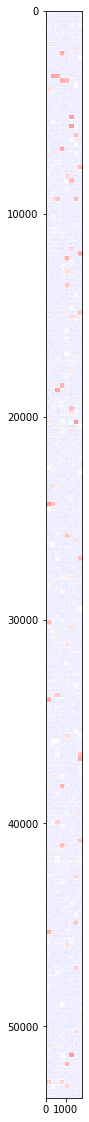

<Figure size 1440x1440 with 0 Axes>

In [214]:
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['input'], padding=0)[0][None, ...].permute((1, 2, 0)),cmap="seismic")
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['target'].float().unsqueeze(1), padding=0).permute((1, 2, 0)))

In [169]:
tb = SummaryWriter('/home/makam0a/tensorboard/denoising/test/')

PermissionError: [Errno 13] Permission denied: '/home/makam0a'

In [170]:
model.eval() # set to evaluation mode

# Visualize validation sample
sample = iter(valid_loader).next()
x = sample['input'].cuda()
y_pred, y = model(x), sample['target']

0.38316960430054325
0.30114870498210616
0.2938735656134835
0.297344306627242
0.31216654225069607
0.3082725566907715
0.27941003855365887
0.2747208582511676
0.302084302636283160.2622184372588769

0.2540297192018255
0.3178228725862102
0.30122823121246634
0.27193154719975215
0.27763649835859483
0.26849240216452946
0.27595236304751175
0.297003063994068840.32872982952902247

0.3265649338282891
0.2787946812701773
0.2584661558355382
0.2807562062772645
0.2743228366561881
0.3033406127875199
0.2959970744002542
0.25726182970562583
0.3916982061727873
0.263038396307043
0.2942931750262136
0.3344240529305312
0.323545742611712
0.3067194179978451
0.3490088583910576
0.2610384694520618
0.2790011074091044
0.26843698501706664
0.286597384458856
0.2806397560631759
0.2776775236402699


In [171]:
input_ = torchvision.utils.make_grid(sample['input'], padding=0)
target_ = torchvision.utils.make_grid(sample['target'].float(), padding=0)
tb.add_image("inputs", input_)
tb.add_image("targets", target_)
tb.add_graph(model, sample['input'].cuda())
tb.close()

NameError: name 'tb' is not defined

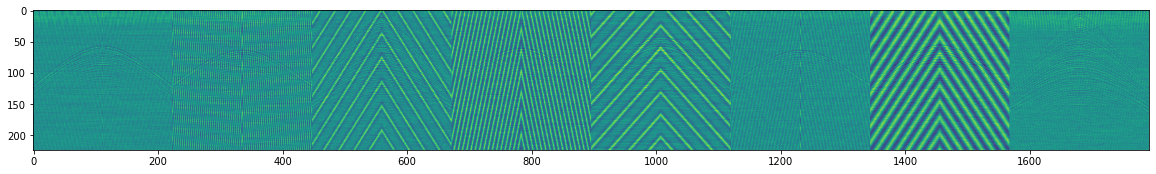

In [172]:
figure(figsize=(20,20)); imshow(input_[0][None,...].permute((1, 2, 0)))

In [75]:
torchvision.utils.make_grid?

In [55]:
torchvision.utils.make_grid?